# Deep Learning Basics

Полезные материалы:    
- <a href="https://neerc.ifmo.ru/wiki/index.php?title=%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8_%D1%80%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9">Практика реализации нейронных сетей</a>               
- <a href="https://pytorch.org/docs/stable/nn.html">pytorch.org</a>        
- <a href="https://keras.io/layers/about-keras-layers">keras.io</a>        
- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/Layer">www.tensorflow.org</a>
- <a href="https://natasha.github.io/">Проект Natasha</a>
- <a href="https://github.com/natasha"> github.com/natasha</a>
- <a href="https://habr.com/ru/articles/516098/">habr.com Проект Natasha</a>
- <a href="https://pymorphy2.readthedocs.io/en/stable/"> Морфологический анализатор pymorphy2</a>

**Структура ноутбука**:    
1. Основные фреймворки автоматического дифференцирования    
    1.1 Tensorflow    
    1.2 Pytorch      
2. NLP. Методы предобработки текста      
    2.1 Различные методы предобработки текста    
    2.2 Библиотека Natasha       
    2.3 Классификация текста простыми методами без предобработки и после лемматизации              

In [ ]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
# !pip install tensorflow
# !pip install pymorphy2
# !pip install pymystem3
# !pip install natasha
# !pip install gensim

# !pip install pymorphy2[fast]
# !pip install -U pymorphy2-dicts-ru
# !pip install -U pymorphy2-dicts-uk
# !pip install conllu

In [2]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os, re, math, random, keras
from collections import Counter
from tqdm import tqdm

import natasha
from natasha import Segmenter, NewsEmbedding, NewsMorphTagger, NewsSyntaxParser, Doc

import pymystem3
from pymystem3 import Mystem

# import pymorphy2
# import gensim
# from gensim.models import FastText

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader,  TensorDataset, RandomSampler, SequentialSampler
from torch.nn.utils.rnn import pad_sequence
from datasets import load_dataset
# from torchtext import datasets

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import fetch_20newsgroups

import warnings
warnings.filterwarnings("ignore")

In [5]:
import transformers
from transformers import pipeline
transformers.__version__

'4.51.3'

In [ ]:
# torch. __version__
!python --version

Python 3.12.7


In [ ]:
print("TF", tf.__version__)
print("Keras", keras.__version__)

TF 2.19.0
Keras 3.9.2


In [ ]:
# !pip install tensorflow==2.19

In [ ]:
# Проверка работы GPU в колабе
tf.test.gpu_device_name()

In [ ]:
# GPU count and name
!nvidia-smi -L

In [ ]:
# use this command to see GPU activity
!nvidia-smi

# 1. Основные фреймворки автоматического дифференцирования     
    1.1 Tensorflow     
    1.2 Pytorch       

## 1.1 Tensorflow

**Построим для начала MLPClassifier (Fingers MNIST) при помощи Sklearn**

(60000, 28, 28)
(10000, 28, 28)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)


x_train_image (28, 28, 3)
Пример кусочка картинки (пиксели со значениями от 0 до 255):


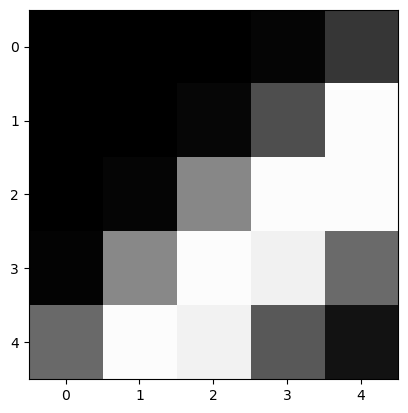

Пример картинки:


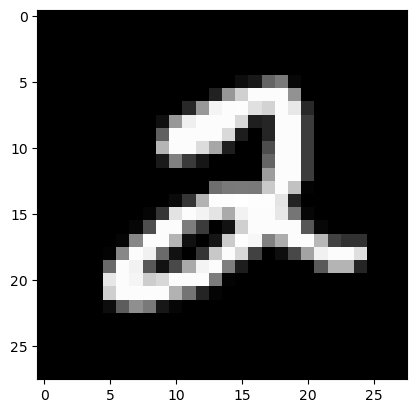

y_train shape (60000,) 
10 меток: [5 0 4 1 9 2 1 3 1 4]


In [ ]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_val.shape)
display(y_train[:10])
display(y_val[:10])
print()

x_train_image = np.tile(x_train[5, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))
print('x_train_image', x_train_image.shape)
print("Пример кусочка картинки (пиксели со значениями от 0 до 255):")
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")
plt.show()

print("Пример картинки:")
plt.imshow(x_train_image, cmap="Greys")
plt.show()
print(f"y_train shape {y_train.shape} \n10 меток: {y_train[:10]}")

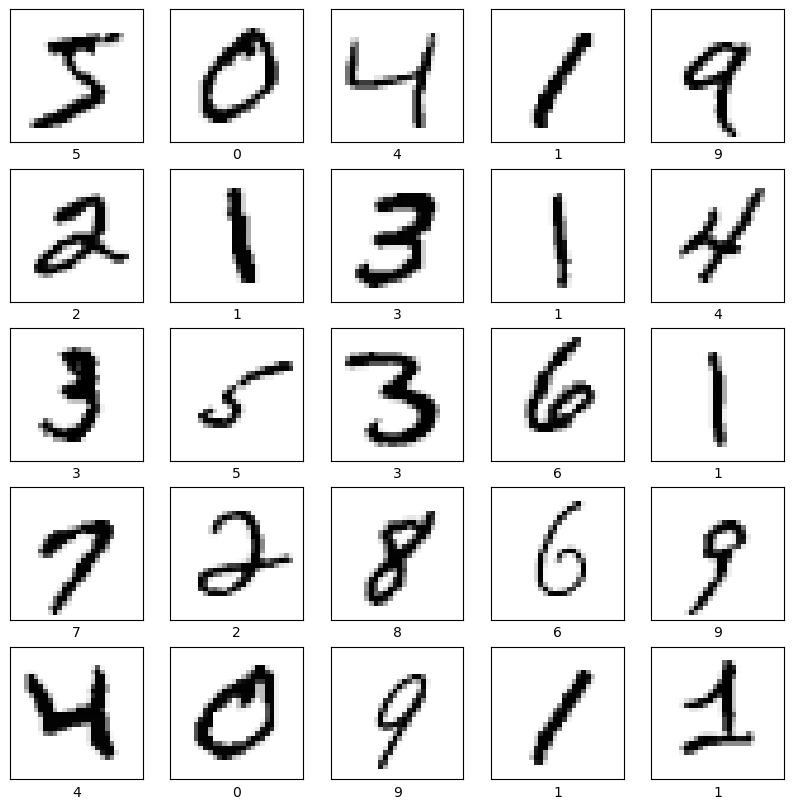

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="Greys")
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
x_train_flat = x_train.reshape(-1, 28*28).astype(float)  # Превратим картинку 28x28 в вектор длины 784, вытянув ее построчно
x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_train_flat.shape)  # (60000, 784)
print(x_val_flat.shape)  # (10000, 784)

from sklearn.preprocessing import StandardScaler         # Центрирование и нормировка
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_val_flat = scaler.transform(x_val_flat)
x_train_flat[0, ::20]

(60000, 784)
(10000, 784)


array([ 0.        ,  0.        , -0.03059266, -0.00852241, -0.01408835,
       -0.2625969 , -0.16124756,  0.        ,  1.71565971,  0.74933951,
       -0.11300485, -0.19700703,  1.12192712,  0.27021375, -0.00577281,
       -0.70132425,  1.64634567, -0.1273685 , -0.15382451, -0.19833719,
       -0.70732309, -0.00477028, -0.60978718, -0.9194134 , -0.17786005,
       -0.16833376,  0.65022085, -0.63188648,  0.        , -0.48806277,
        1.17394853, -0.14774138, -0.07003976, -0.61257571,  3.52099754,
        0.        , -0.09396514, -0.1826269 , -0.00579016,  0.        ])

In [ ]:
# Нейросеть строит сложную функцию логистических регрессий. Наслоение логистических регрессий усложняет функцию, но не усложняет способ её обучения
# MLPClassifier —  полносвязная сеть
%%time
from sklearn.neural_network import MLPClassifier  # Многослойный персептрон - много полносвязных слоев
clf = MLPClassifier(max_iter=10, random_state=0)
clf.fit(x_train_flat, y_train)
accuracy_score(y_val, clf.predict(x_val_flat))

CPU times: total: 27.3 s
Wall time: 15.3 s


0.9742

In [ ]:
# activation = 'tanh'
from sklearn.neural_network import MLPClassifier  # многослойный персептрон (много полносвязных слоев)
clf = MLPClassifier(max_iter = 100, activation = 'tanh', random_state = 0)
clf.fit(x_train_flat, y_train)
accuracy_score(y_val, clf.predict(x_val_flat))

0.9662

**Tensorflow MLPClassifier (Fingers MNIST)**

*В Tensorflow (статически вычислительный граф)* строится граф вычислений, затем компилируется, оптимизация запускается через model.fit(). Цикл обучения имплементирован на C++, поэтому недоступен извне. Нельзя контролировать, отлаживать промежуточные вычисления.

*Простой Multi layer Perceptron (MLP) классификатор в Keras (по аналогии с MLPClassifier из sklearn)*

Посчитаем логиты (logit, линейное преобразование) $z_k$ для каждого класса: $$z_k = \vec{x} \cdot \vec{w_k} + b_k \quad k = 0..9$$

Затем переведем логиты $z_k$ в вероятности $p_k$ при помощи функции softmax: $$p_k = \frac{e^{z_k}}{\sum_{i=0}^{9}{e^{z_i}}} \quad k = 0..9$$

Будем использовать cross-entropy для минимизации ошибки: $$\text{cross-entropy}(y, p) = -\sum_{k=0}^{9}{\log(p_k)[y = k]}$$

где $$ [x]=\begin{cases} 1, \quad \text{если $x$ истина} \\ 0, \quad \text{иначе} \end{cases} $$

Минимизация cross-entropy двигает $p_k$ в сторону 1 когда $y = k$


In [ ]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

x_train_flat = x_train.reshape(-1, 28*28).astype(float)     # вытянем картинку в вектор размера 28*28=784
x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_train.shape, x_val.shape)
print(x_train_flat.shape, x_val_flat.shape)

x_train_float = x_train_flat.astype(float) / 255 - 0.5      # центрируем и нормируем. Это действия аналогичны нормализации StandardScaler
x_val_float = x_val_flat.astype(float) / 255 - 0.5

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [ ]:
y_train_oh = keras.utils.to_categorical(y_train, 10)  # one-hot encode для ответов
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5], sep = '\n')

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[5 0 4 1 9]


In [ ]:
clear_session()

In [ ]:
# Архитектура сети
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(x_train_float.shape[1],))) # первый скрытый слой - указываем кол-во вход. признаков
model.add(Dense(128, activation='relu',))   # второй скрытый слой
model.add(Dense(10, activation='softmax',)) # выходной слой

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
model.compile(loss='categorical_crossentropy',  # минимизируем кросс-энтропию
              optimizer='adam',                 # так будет быстрее
              metrics=['accuracy']              # выводим процент правильных ответов
                )

In [ ]:
history = model.fit(x_train_float,
                    y_train_oh,
                    batch_size=64,     # 64 объекта для подсчета градиента на каждом шаге
                    epochs=10,         # 10 итераций
                    validation_data=(x_val_float, y_val_oh))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8445 - loss: 0.5134 - val_accuracy: 0.9435 - val_loss: 0.1877
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9507 - loss: 0.1557 - val_accuracy: 0.9561 - val_loss: 0.1450
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9649 - loss: 0.1115 - val_accuracy: 0.9667 - val_loss: 0.1053
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9736 - loss: 0.0826 - val_accuracy: 0.9699 - val_loss: 0.0932
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9767 - loss: 0.0744 - val_accuracy: 0.9754 - val_loss: 0.0755
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9816 - loss: 0.0577 - val_accuracy: 0.9748 - val_loss: 0.0817
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9828 - loss: 0.0520 - val_accuracy: 0.9729 - val_loss: 0.0919
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9852 - loss: 0.0464 - val_accuracy: 0.

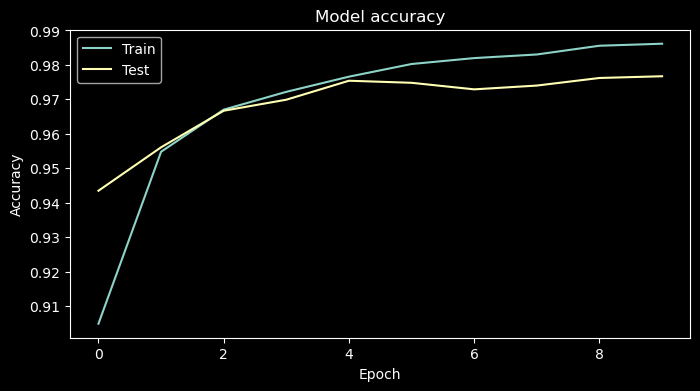

In [ ]:
plt.style.use(['dark_background'])  # Plot training & validation accuracy values
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

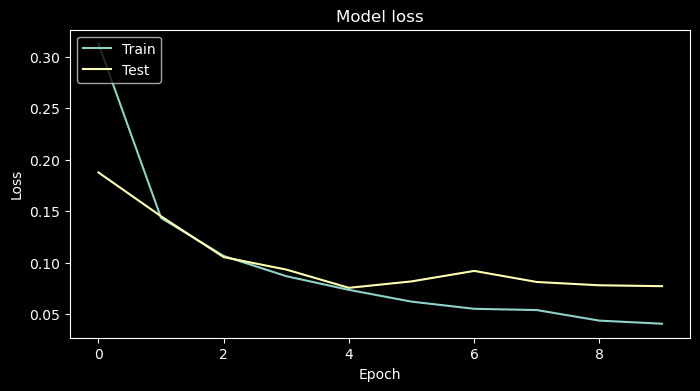

In [ ]:
# Plot training & validation loss values
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Видно, что модель постепенно начинает переобучаться 

In [ ]:
predictions = model.predict(x_val_float)
predicted_classes = predictions.argmax(axis=1)
# np.argmax(model.predict(x_val_float), axis = 1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.07163887e-08, 2.88180217e-07, 1.16776118e-06, ...,
        9.99958277e-01, 1.21041319e-08, 2.38872908e-05],
       [1.56026285e-08, 4.10862881e-08, 9.99999762e-01, ...,
        5.15820053e-09, 1.76285653e-09, 3.20016430e-19],
       [1.50603778e-08, 9.99753416e-01, 5.60373246e-06, ...,
        7.64790821e-05, 3.95639654e-05, 8.67705637e-07],
       ...,
       [1.24897332e-19, 6.31650158e-12, 1.19859778e-14, ...,
        8.72418734e-11, 1.32319211e-09, 4.66599062e-07],
       [1.01578834e-07, 1.87062865e-10, 1.02123752e-11, ...,
        1.27822615e-08, 6.33310719e-07, 1.07166179e-10],
       [2.56501730e-11, 1.23459558e-14, 1.88345929e-15, ...,
        1.41262146e-16, 2.92027931e-13, 5.43585393e-14]], dtype=float32)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
display(predicted_classes)
print('Test Accuracy: ', accuracy_score(y_val, predicted_classes))

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Test Accuracy:  0.9767


In [ ]:
clear_session()

**Tensorflow MLPClassifier (Fashion MNIST)**

In [ ]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(y_train[:5])
print(y_val[:5])
print()
np.unique(y_train)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[9 0 0 3 0]
[9 2 1 1 6]



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Пример кусочка картинки (пиксели со значениями от 0 до 255):
Пример картинки:
y_train (60000,) 10 примеров: [9 0 0 3 0 2 7 2 5 5]


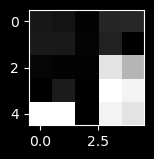

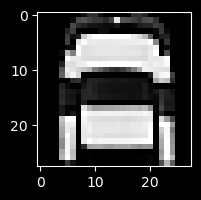

In [ ]:
x_train_image = np.tile(x_train[125, :, :].reshape((28, 28))[:, :, np.newaxis], (1, 1, 3))    # Рассмотрим одну картинку
print("Пример кусочка картинки (пиксели со значениями от 0 до 255):")
plt.figure(figsize = (4,1.5))
plt.imshow(x_train_image[15:20, 5:10], cmap="Greys")

print("Пример картинки:")
plt.figure(figsize = (5, 2))
plt.imshow(x_train_image, cmap="Greys")
print(f"y_train {y_train.shape} 10 примеров: {y_train[:10]}")

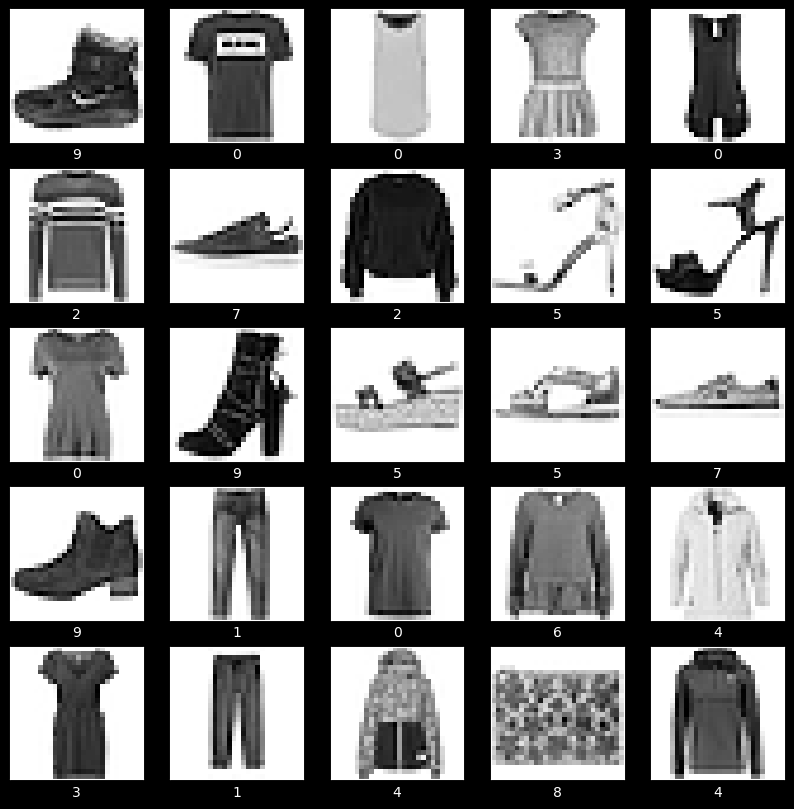

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="Greys")
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
x_train_flat = x_train.reshape(-1, 28*28).astype(float)  # Подготовим данные
x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_train.shape, x_val.shape)
print(x_train_flat.shape, x_val_flat.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [ ]:
x_train_float = x_train_flat.astype(float) / 255 - 0.5   # Центрируем и нормируем
x_val_float = x_val_flat.astype(float) / 255 - 0.5

# нормализация через StandardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train_flat = scaler.fit_transform(x_train_flat)
# x_val_flat = scaler.transform(x_val_flat)

y_train_oh = keras.utils.to_categorical(y_train, 10)  # one-hot encode для ответов
y_val_oh = keras.utils.to_categorical(y_val, 10)
print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5], sep = '\n')

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[9 0 0 3 0]


In [ ]:
clear_session()

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_float.shape[1],)))
model.add(Dense(128, activation='relu',))
model.add(Dense(10, activation='softmax',))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_float, y_train_oh, batch_size=64, epochs=5, validation_data=(x_val_float, y_val_oh))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7723 - loss: 0.6424 - val_accuracy: 0.8429 - val_loss: 0.4390
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8650 - loss: 0.3699 - val_accuracy: 0.8607 - val_loss: 0.3933
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8789 - loss: 0.3283 - val_accuracy: 0.8663 - val_loss: 0.3662
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8867 - loss: 0.3036 - val_accuracy: 0.8700 - val_loss: 0.3647
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8924 - loss: 0.2874 - val_accuracy: 0.8727 - val_loss: 0.3549


In [ ]:
predictions = model.predict(x_val_float)
predicted_classes = predictions.argmax(axis=1)
# np.argmax(model.predict(x_val_float), axis = 1)
print('Test Accuracy: ', accuracy_score(y_val, predicted_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy:  0.8727


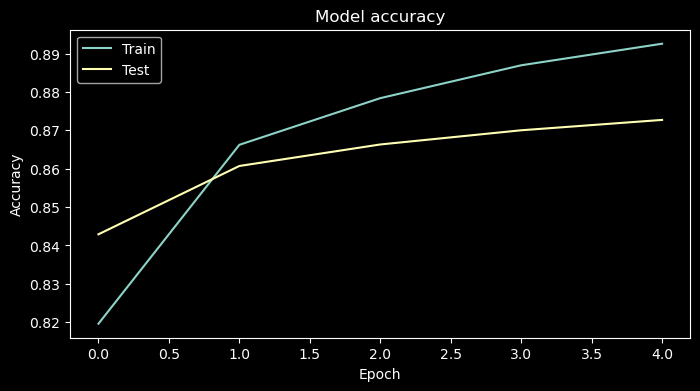

In [ ]:
plt.style.use(['dark_background'])  # Plot training & validation accuracy values
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

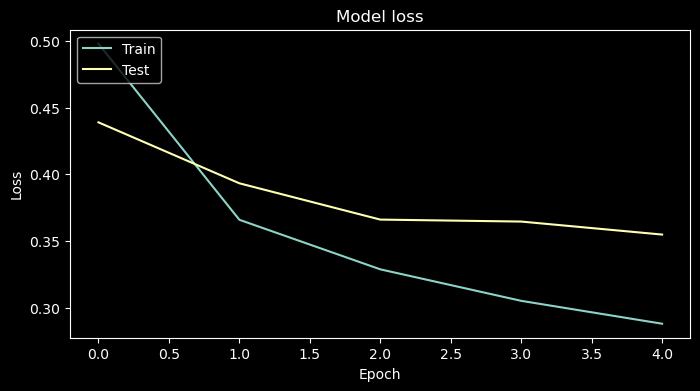

In [ ]:
plt.style.use(['dark_background'])  # Plot training & validation loss values
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
clear_session()

## 1.2 PyTorch

- **В Tensorflow (статически вычислительный граф)** строится граф вычислений, затем компилируется, оптимизация запускается через model.fit(). Цикл обучения имплементирован на C++, поэтому недоступен извне. Нельзя контролировать, отлаживать промежуточные вычисления
- **В PyTorch (динамически вычислительный граф)** центральное место разработки модели — цикл обучения, шаги обучения прописываются самостоятельно, можно контролировать, отлаживать промежуточные вычисления. В одном цикле считаем таргет, проходя граф вычислений, считаем ошибку, градиент ошибки и делаем обновление весов

Модель оборачиваем в класс, унаследованный от **nn.Module**   
Обычный шаблон построения модели в **PyTorch** выглядит так:


```
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
```

В PyTorch есть большое количество предобученных моделей, среди которых:       
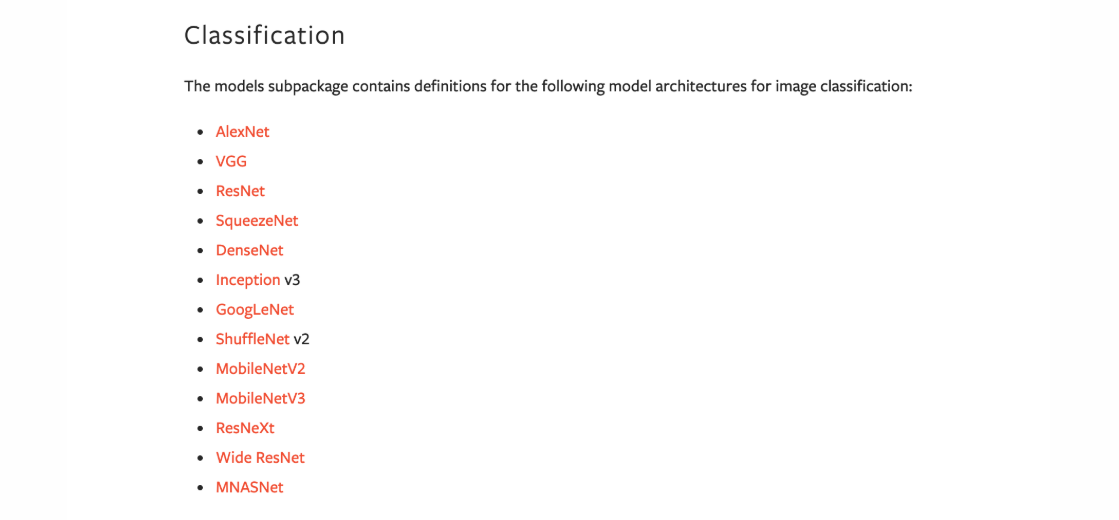  
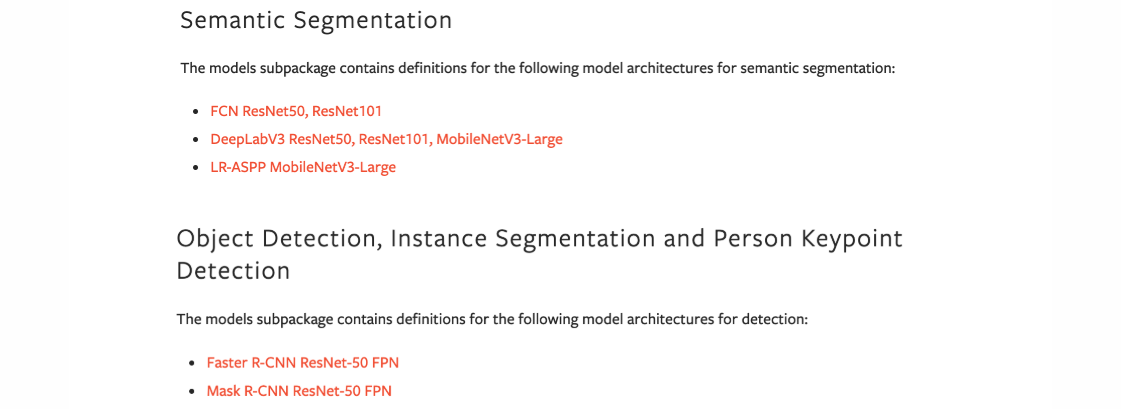


### Линейная регрессия

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'   # Определим, где будут находиться тензоры: на GPU или CPU
device

'cpu'

train (80, 1) (80, 1) 
val (20, 1) (20, 1)


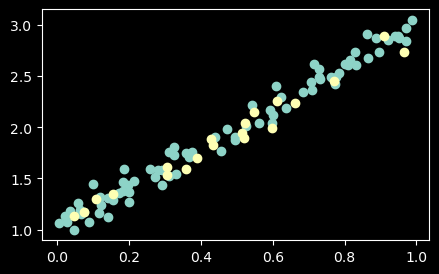

In [ ]:
np.random.seed(42) 
data_size = 100

x = np.random.rand(data_size, 1)
y = 1 + 2 * x + .1 * np.random.randn(data_size, 1)

idx = np.arange(data_size)      # перемешаем индексы
np.random.shuffle(idx)

margin = int(data_size * 0.8)   # возьмем первые 80% для тренировки
train_idx = idx[:margin]
val_idx = idx[margin:]          # оставшиеся 20% для валидации

x_train, y_train = x[train_idx], y[train_idx]   # разделим датасеты
x_val, y_val = x[val_idx], y[val_idx]
print('train', x_train.shape, y_train.shape, '\nval', x_val.shape, y_val.shape)
plt.figure(figsize = (5,3))
plt.plot(x_train, y_train, 'o')
plt.plot(x_val, y_val, 'o')

In [ ]:
x_train[:10]

array([[0.77127035],
       [0.06355835],
       [0.86310343],
       [0.02541913],
       [0.73199394],
       [0.07404465],
       [0.19871568],
       [0.31098232],
       [0.47221493],
       [0.96958463]])

In [ ]:
lr = 1e-1   # Определим гиперпараметры: количество эпох и шаг обучения learning rate. Зафиксируем генератор случайных чисел в PyTorch
n_epochs = 1000
torch.manual_seed(42)

x_train_tensor = torch.from_numpy(x_train).float().to(device)  # Создадим тензоры для исходных данных
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# Создадим тензоры для параметров регрессии а и b. Инициализируем их случайными значениями, requires_grad=True
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
a

tensor([0.3367], requires_grad=True)

In [ ]:
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):       # Цикл обучения
    yhat = a + b * x_train_tensor   # Считаем yhat, ошибку, лосс
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()      # MAE: loss = error.abs().mean()

    loss.backward()  # Считаем градиент для каждого тензора (а и b) и записываем его в параметры a и b

    # Обновляем параметры. Обязательно делать это в режиме no_grad()
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    optimizer.zero_grad()  # Обнуляем градиенты

print(f'a = {a.item()}, b = {b.item()}')

a = 1.023543119430542, b = 1.9689600467681885


### Классификации изображений FashionCNN

In [ ]:
# Определим, где будут тензоры: на GPU или CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

# Загрузим датасет Fashion MNIST
train_set = torchvision.datasets.FashionMNIST("./data", download=True,  transform=transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False,  transform=transforms.Compose([transforms.ToTensor()]))

In [ ]:
print(train_set.data.shape)
print(test_set.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [ ]:
train_set.data[:2]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [ ]:
train_set

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
test_set

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
# Инициализировать загрузчики данных
batch_size = 100
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)
train_loader

In [ ]:
train_loader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
train_loader.batch_size

100

In [ ]:
for batch_idx, (data, target) in enumerate(train_loader):
    print("Batch index:", batch_idx)
    print("Data:", data)
    print("Target:", target)
    print()
    print("Data shape:", data.shape)
    print("Target shape:", target.shape)
    break  #  посмотреть только первый батч

Batch index: 0
Data: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          

In [ ]:
# 10 классов одежды
def output_label(label):
    output_mapping = {0: "T-shirt/Top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
                      5: "Sandal",  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

Picture data shape: torch.Size([100, 1, 28, 28])
Dataset size: 60000
Ankle Boot


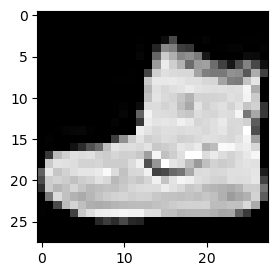

In [ ]:
# Выведем некоторые параметры
a = next(iter(train_loader))
print(f'Picture data shape: {a[0].size()}')
print('Dataset size:', len(train_set))

image, label = next(iter(train_set))
plt.figure(figsize = (5,3))
plt.imshow(image.squeeze(), cmap="gray")
print(output_label(label))

- При построении нейронной сети определяется класс FashionCNN, который наследуется от nn.Module, базового класса для всех нейронных сетей в PyTorch. Метод forward() используется для построения вычислительного графа.
- В этой нейронной сети два сверточных слоя и два полносвязных слоя, дропаут, для добавления нелинейности используется ReLU, функция потерь кросс-энтропия.
- Внешний цикл проходит по 5 эпохам. Внутренний цикл проходит по батчам (в каждом 100 изображений 28х28). Для каждого батча выполняется прямое распространение, вычисляется loss, обнуляются градиенты, выполняется обратное распространение ошибки и обновляются веса. Каждые 50 итераций вычисляется точность на тестовых данных и сохраняются значения потерь и точности.
- Сверточный слой (первый):
  - in_channels=1 -Количество входных каналов для каждого изображения (один канал т.к. картинка черно-белая)
  - out_channels=32 -Количество выходных каналов (фильтров), которые будут применены к каждому изображению. Каждый фильтр извлекает определенные признаки из изображения, такие как края, текстуры и т.д. После свертки каждое изображение будет представлено 32 картами признаков (feature maps). Каждая карта признаков обычно реагирует на разные типы особенностей в изображении (например, края, текстуры и т.д.)
  - kernel_size=3 -Размер ядра свертки, т.е. размер фильтра. Ядро размером 3x3 (3 пикселя в ширину и 3 в высоту).  
  - padding=1 -Добавление нулевых пикселей (или пикселей с ближайшим значением) вокруг изображения для сохранения размеров. Без padding размер выходного изображения уменьшается по сравнению с входным из-за операции свертки. Например, если есть изображение размером 28x28 и мы применим свертку с ядром 3x3 без padding, размер выходного изображения будет 26x26 (поскольку ядро не может полностью поместиться на границе изображения). Добавление padding позволяет захватить больше пространственной информации с границы изображения.
- nn.BatchNorm2d() -Пакетная нормализация, которая нормализует выходы предыдущего слоя для ускорения обучения и улучшения стабильности.
- nn.ReLU() -Функция активации Rectified Linear Unit = max(0, x), которая добавляет нелинейность в модель.
  - *Leaky ReLU* F(x)=x если x>0,  F(x)=αx если x≤0, где α — небольшой положительный коэффициент (обычно α=0.01) - позволяет небольшим отрицательным значениям проходить через сеть, что помогает избежать проблемы "умирающих" нейронов. Даже если активация отрицательна, она все равно передается в следующий слой, что может помочь сохранить больше информации. Немного более затратна в вычислительном плане
- nn.MaxPool2d(kernel_size=2, stride=2)  -Слой пулинга, который уменьшает размерность данных, выбирая максимальное значение в каждом окне размером 2x2. Это уменьшает пространственные размеры карт признаков, что помогает сократить количество параметров и вычислений в последующих слоях, а также контролировать переобучение. Пулинг делает сеть более устойчивой к небольшим смещениям и искажениям в изображении, так как он фокусируется на максимальных значениях в локальных областях
  - kernel_size=2 - параметр определяет размер окна пулинга (2x2 пикселя)
  - stride=2 - параметр определяет шаг, с которым окно пулинга перемещается по карте признаков. Это приводит к уменьшению размеров карты признаков в два раза по ширине и высоте.
- Формулы для размера выхода сверточного слоя:
  - Общая формула:    
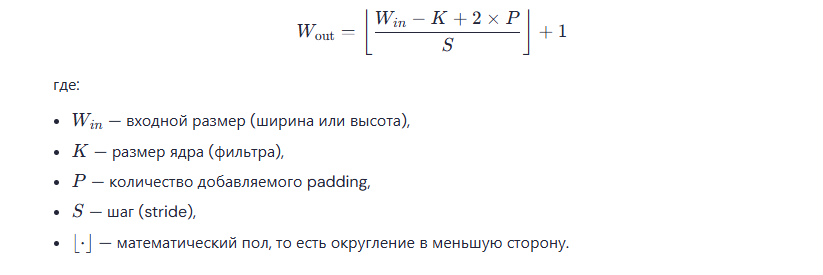
    
Padding (P) —  количество пикселей, добавленных по периметру изображения. Если добавляется по P пикселей с каждой стороны, то всего к размеру прибавляется 2×P (по одному с каждой стороны).     

*(W - K)/S + 1*   где  W — входной размер (например, ширина или высота), K — размер ядра (фильтра), S — шаг (stride)    

 - Когда параметры не указаны (по умолчанию padding = 0 и stride = 1) для определения размера выхода сверточного слоя применяют формулу:
   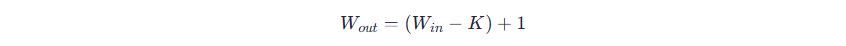

In [ ]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        # Применяется свертка с 32 фильтрами, пакетная нормализация, добавление нелинейности ReLU и пуллинг (уменьшение размерности карт признаков)
        # Количество фильтров 32 (out_channels), размер каждого фильтра (kernel_size) — 3×3
        self.layer1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
                                    nn.BatchNorm2d(32),
                                    nn.ReLU(),
                                    nn.MaxPool2d(kernel_size=2, stride=2) )  # Размерность выходного тензора: [batch_size=100, 32, 14, 14]

        # Применяется свертка с 64 фильтрами, размер параметров каждого фильтра: 3*3*32=288
        self.layer2 = nn.Sequential(nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
                                    # Каждый фильтр учитывает информацию из всех 32 каналов для создания одной новой карты признаков
                                    # Каждый фильтр имеет 3x3x32 = 288 параметров (весов)
                                    nn.BatchNorm2d(64),  # Размерность выходного тензора до пуллинга: [batch_size=100, 64, 12, 12]
                                    nn.ReLU(),
                                    nn.MaxPool2d(2) )  # Размерность выходного тензора после пуллинга: [batch_size=100, 64, 6, 6]   64-число фильтров

        self.fc1 = nn.Linear(in_features=64*6*6, out_features=200)   # Полносвязный слой
        # Dropout2d(0.25), вызывается к вектору после слоя fc1. Однако, его рекомендуется применять к тензорам с 4 измерениями,
        # а не к плоскому вектору фильтров.В таком случае nn.Dropout2d на каждом шаге случайным образом «отключает» каналы (карты признаков) в тензоре
        # Это помогает повысить устойчивость модели и предотвратить переобучение, делая каждое обучение чуть более случайным и разнообразным
        # При тестировании или использовании модели для предсказаний отключение не происходит — все карты признаков используют свои значения
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=200, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # Преобразование тензора, чтобы совпала размерность
        out = self.fc1(out)
        out = self.drop(out)  # Однако, Dropout2d обычно применяют до view(), т.е. к сверточным признакам (4D), а к "плоским"вектоарм -nn.Dropout(0.25)
        out = self.fc2(out)
        out = self.fc3(out)

        return out

In [ ]:
64*6*6

2304

In [ ]:
# Инициализируем модель и оптимизатор
model = FashionCNN()
model.to(device)
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=200, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=200, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [ ]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

Тренируем нейросеть и проверяем качество на тестовом наборе данных

In [ ]:
num_epochs = 5
count = 0

loss_list = []         # Lists for visualization of loss and accuracy
iteration_list = []
accuracy_list = []

predictions_list = []  # Lists for getting classwise accuracy
labels_list = []

for epoch in range(num_epochs):  # 5
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)   # Transfering images and labels to GPU if available
        train = images

        outputs = model(train)  # Forward pass
        loss = error(outputs, labels)
        optimizer.zero_grad()  # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        loss.backward()        # Backward propagating
        optimizer.step()       # Optimizing the parameters (Adam)

        count += 1

        if not count % 50:   # Testing the model
            total = 0
            correct = 0

            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)    
                
                test = images
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)

                correct += (predictions == labels).sum()
                total += len(labels)

            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if not (count % 500):
            print(f"Epoch: {epoch}, Iteration: {count}, Loss: {loss.data}, Accuracy: {accuracy:4.2f}")

Epoch: 0, Iteration: 500, Loss: 0.5095431804656982, Accuracy: 87.04
Epoch: 1, Iteration: 1000, Loss: 0.3688046336174011, Accuracy: 89.20
Epoch: 2, Iteration: 1500, Loss: 0.3223434090614319, Accuracy: 87.55
Epoch: 3, Iteration: 2000, Loss: 0.22004923224449158, Accuracy: 89.30
Epoch: 4, Iteration: 2500, Loss: 0.12336284667253494, Accuracy: 90.41
Epoch: 4, Iteration: 3000, Loss: 0.15689092874526978, Accuracy: 90.87


In [ ]:
# Входные данные для первого сверточного слоя имеют размерность [100, 1, 28, 28]
# В батче 100 изображений, каждое из которых имеет размер 28x28 пикселей и 1 канал, поскольку изображения черно-белые
images.shape

torch.Size([100, 1, 28, 28])

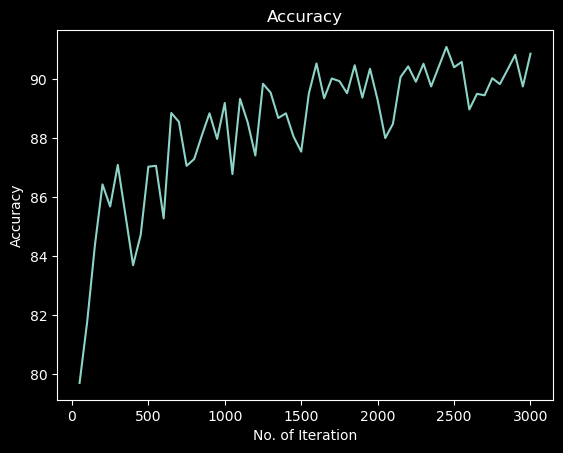

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.show()

### Классификация изображений CIFAR10  
Обучим модель классификации изображений датасета CIFAR10, который содержит 60к цветных картинок разрешения 32х32 принадлежащих 10 классам.

**Аугментация** - процесс расширения набора данных для обучения, применяя различные преобразования к существующим изображениям (повороты, отражения, смещения, изменение цвета, вытягивание или сжатие изображения, дефокус, блюр и др.). Цель аугментации – увеличить разнообразие обучающих примеров, улучшая обобщающую способность моделей. Модель становится более инвариантна к положению изображения или цвету и учится лучше распознавать только те паттерны, которые ему характерны. Добавляется некий стохастический эффект обучению. Большое количество доступных трансформаций лежат в библиотеке torchvision.transforms      



Некоторые методы, которые можно комбинировать в transforms.Compose для создания сложных конвейеров аугментации данных:    
- ColorJitter - Случайным образом изменяет яркость, контрастность, насыщенность и оттенок изображения *transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)*
- RandomRotation - Поворачивает изображение на случайный угол в заданном диапазоне *transforms.RandomRotation(degrees=45)*
- RandomResizedCrop - Обрезает изображение до случайного размера и затем изменяет его размер до заданного *transforms.RandomResizedCrop(size=(32, 32))*
- RandomAffine - Применяет аффинные преобразования, такие как поворот, масштабирование и сдвиг *transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2))*
- RandomGrayscale - Преобразует изображение в оттенки серого с заданной вероятностью *transforms.RandomGrayscale(p=0.1)*
- RandomPerspective - Применяет перспективное искажение к изображению (изменяется перспектива изображения, имитируя эффект изменения точки обзора- это может включать в себя изменение углов, масштабирование и смещение частей изображения) *transforms.RandomPerspective(distortion_scale=0.5, p=0.5)*
- RandomVerticalFlip - Случайным образом отражает изображение по вертикали *transforms.RandomVerticalFlip(p=0.5)*
- RandomErasing - Случайным образом стирает прямоугольные области изображения *transforms.RandomErasing(p=1.0, scale=(0.02, 0.33), ratio=(0.3, 3.3))*
- GaussianBlur - Применяет размытие по Гауссу к изображению *transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))*

In [ ]:
# Трансформации для обучающего набора данных. RandomCrop и RandomHorizontalFlip являются методами аугментации данных, помогают увеличить разнообразие
transform_train = transforms.Compose([transforms.RandomCrop(32, padding=4),   # Случайно обрезает изобр. до размера 32x32 пикс., добавляя отступ в 4 пикс.
                                      transforms.RandomHorizontalFlip(),      # Случайно отражает изображения по горизонтали
                                      # transforms.RandomRotation(degrees=15),  # Поворачивает изображение на случайный угол в заданном диапазоне
                                      # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Изменение яркости, контр-ти и др.
                                      transforms.ToTensor(),                  # Преобразует изображения в тензоры PyTorch
                                      # Нормализует тензоры с использованием средних и стандартных отклонений для каждого цветового канала (RGB)
                                      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
# Трансформации для тестового набора данных
transform_test = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
batch_size = 512
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# DataLoader - создает загрузчик данных, который будет загружать данные пакетами, перемешивать их и исп-ть 2 рабочих процесса для ускорения загрузки
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False, num_workers=2)

In [ ]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

In [ ]:
testset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )

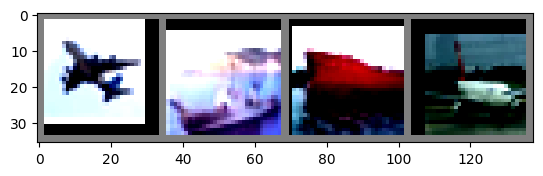

plane  ship  ship plane


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
# Простая модель с несколькими сверточными и полносвязными слоями
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))
        x = self.pool(nn.ReLU()(self.bn3(self.conv3(x))))
        x = nn.Flatten()(x)
        x = self.dropout(nn.ReLU()(self.fc1(x)))
        x = self.dropout(nn.ReLU()(self.fc2(x)))
        x = nn.Softmax()(self.fc3(x))
        return x

net = Net()

# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, kernel_size = 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(nn.Tanh()(self.conv1(x)))
#         x = self.pool(nn.Tanh()(self.conv2(x)))
#         x = nn.Flatten()(x)
#         x = nn.Tanh()(self.fc1(x))
#         x = nn.Tanh()(self.fc2(x))
#         x = nn.Softmax()(self.fc3(x))
#         return x

In [ ]:
# Поместим модель на GPU, выберем в качестве лосс-функции кросс-энтропию, в качестве оптимизатора - Адам
net = net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

for epoch in range(17):
    for X_batch, y_batch in trainloader:
        X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
        optimizer.zero_grad()
        predictions = net(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()

In [ ]:
print(X_batch.shape)
print(predictions.shape)
loss

torch.Size([336, 3, 32, 32])
torch.Size([336, 10])


tensor(1.8110, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# Точность предсказания на валидационной выборке
for X_batch, y_batch in testloader:
    X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
    # Временно отключает вычисление градиентов для всех операций внутри блока (когда выполняются операции, которые не требуют обучения модели, такие как оценка модели на test)
    with torch.no_grad():
        predictions = net(X_batch)

    true_lab = y_batch.cpu().numpy()
    _, preds = torch.max(predictions, dim=1)
    # print(true_lab)
    # print(preds)
    print('accuracy_score: ', accuracy_score(true_lab, preds.detach().cpu().numpy()))

accuracy_score:  0.6495


In [ ]:
print(predictions.shape)
predictions[:2]

torch.Size([10000, 10])


tensor([[1.7185e-12, 3.8613e-12, 3.5346e-11, 9.3167e-01, 6.7899e-12, 6.8334e-02,
         1.9377e-10, 9.4197e-12, 2.2401e-07, 2.2666e-10],
        [4.1453e-16, 7.8982e-08, 1.2792e-39, 3.7628e-34, 9.6753e-33, 2.4947e-40,
         2.4025e-41, 4.7644e-44, 1.0000e+00, 4.0170e-18]], device='cuda:0')

In [ ]:
print(len(torch.max(predictions, dim=1)))
torch.max(predictions, dim=1)

2


torch.return_types.max(
values=tensor([0.9317, 1.0000, 1.0000,  ..., 1.0000, 0.9986, 1.0000], device='cuda:0'),
indices=tensor([3, 8, 1,  ..., 5, 1, 7], device='cuda:0'))

In [ ]:
print(preds.detach().cpu().numpy().shape) # can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first
preds.detach().cpu().numpy()

(10000,)


array([3, 8, 1, ..., 5, 1, 7])

In [ ]:
print(true_lab.shape)
true_lab

(10000,)


array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
# Изменим оптимизатор на SGD с настройкой параметров lr=0.01, momentum=0.9 и посмотрим на результат
transform_train = transforms.Compose([transforms.RandomCrop(32, padding=4),    # Трансформации для обучающего набора данных
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
transform_test = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]) # Трансформации для тестового набора данных
batch_size = 512
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# DataLoader - создает загрузчик данных, который будет загружать данные пакетами, перемешивать их и исп-ть 2 рабочих процесса для ускорения загрузки
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False, num_workers=2)

net = Net()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9 )

num_epochs = 17
for epoch in range(num_epochs):
    for X_batch, y_batch in trainloader:
        X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
        optimizer.zero_grad()
        predictions = net(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')    # Вывод потерь и точности на каждой эпохе

for X_batch, y_batch in testloader:                                # Оценка точности на тестовых данных
    X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
    with torch.no_grad():
        predictions = net(X_batch)

    true_lab = y_batch.cpu().numpy()
    _, preds = torch.max(predictions, dim=1)
    print('accuracy_score: ', accuracy_score(true_lab, preds.detach().cpu().numpy()))  # 0.5832

Epoch 1/17, Loss: 2.2827367782592773
Epoch 2/17, Loss: 2.2423810958862305
Epoch 3/17, Loss: 2.2096073627471924
Epoch 4/17, Loss: 2.123246192932129
Epoch 5/17, Loss: 2.116737127304077
Epoch 6/17, Loss: 2.05655837059021
Epoch 7/17, Loss: 2.089174747467041
Epoch 8/17, Loss: 2.003824234008789
Epoch 9/17, Loss: 1.9868029356002808
Epoch 10/17, Loss: 1.9524178504943848
Epoch 11/17, Loss: 1.944865107536316
Epoch 12/17, Loss: 1.9501644372940063
Epoch 13/17, Loss: 1.9367742538452148
Epoch 14/17, Loss: 1.9453225135803223
Epoch 15/17, Loss: 1.9587478637695312
Epoch 16/17, Loss: 1.872001051902771
Epoch 17/17, Loss: 1.8730084896087646
accuracy_score:  0.5832


In [ ]:
# Оптимизатор SGD (lr=0.01, momentum=0.9), добавлены методы аугументации, увеличено количество эпох, скорость обучения 0.01
transform_train = transforms.Compose([transforms.RandomCrop(32, padding=4),   # Трансформации для тренировочного набора данных
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(degrees=15),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
transform_test = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]) # Трансформации для тестового набора данных
batch_size = 512
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# DataLoader - создает загрузчик данных, который будет загружать данные пакетами, перемешивать их и исп-ть 2 рабочих процесса для ускорения загрузки
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False, num_workers=2)

net = Net()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

num_epochs = 25
for epoch in range(num_epochs):
    for X_batch, y_batch in trainloader:
        X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
        optimizer.zero_grad()
        predictions = net(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')    # Вывод потерь и точности на каждой эпохе

for X_batch, y_batch in testloader:                                # Оценка точности на тестовых данных
    X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
    with torch.no_grad():
        predictions = net(X_batch)

    true_lab = y_batch.cpu().numpy()
    _, preds = torch.max(predictions, dim=1)
    print('accuracy_score: ', accuracy_score(true_lab, preds.detach().cpu().numpy()))  # 0.5629

Epoch 1/25, Loss: 2.287057399749756
Epoch 2/25, Loss: 2.215076208114624
Epoch 3/25, Loss: 2.2042880058288574
Epoch 4/25, Loss: 2.1358301639556885
Epoch 5/25, Loss: 2.1014857292175293
Epoch 6/25, Loss: 2.0965192317962646
Epoch 7/25, Loss: 2.081935167312622
Epoch 8/25, Loss: 2.0239040851593018
Epoch 9/25, Loss: 2.073716163635254
Epoch 10/25, Loss: 2.0962817668914795
Epoch 11/25, Loss: 2.063361644744873
Epoch 12/25, Loss: 2.0224499702453613
Epoch 13/25, Loss: 2.03391695022583
Epoch 14/25, Loss: 2.00822377204895
Epoch 15/25, Loss: 1.98615300655365
Epoch 16/25, Loss: 1.9360952377319336
Epoch 17/25, Loss: 1.9660050868988037
Epoch 18/25, Loss: 1.9128797054290771
Epoch 19/25, Loss: 1.9368300437927246
Epoch 20/25, Loss: 1.933106541633606
Epoch 21/25, Loss: 1.9454634189605713
Epoch 22/25, Loss: 1.9517500400543213
Epoch 23/25, Loss: 1.9784101247787476
Epoch 24/25, Loss: 1.9685732126235962
Epoch 25/25, Loss: 1.9004290103912354
accuracy_score:  0.5629


In [ ]:
# Оптимизатор Adam, добавлены методы аугументации, увеличено количество эпох, скорость обучения 0.001
transform_train = transforms.Compose([transforms.RandomCrop(32, padding=4),   # Трансформации для тренировочного набора данных
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(degrees=15),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])
transform_test = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])  # Трансформации для тестового набора данных
batch_size = 512
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# DataLoader - создает загрузчик данных, который будет загружать данные пакетами, перемешивать их и исп-ть 2 рабочих процесса для ускорения загрузки
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=False, num_workers=2)

class NEWNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = self.pool(nn.ReLU()(self.bn1(self.conv1(x))))
        x = self.pool(nn.ReLU()(self.bn2(self.conv2(x))))
        x = self.pool(nn.ReLU()(self.bn3(self.conv3(x))))
        x = nn.Flatten()(x)
        x = self.dropout(nn.ReLU()(self.fc1(x)))
        x = self.dropout(nn.ReLU()(self.fc2(x)))
        x = nn.Softmax()(self.fc3(x))
        return x

net = NEWNet()
net = net.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(25):
    for X_batch, y_batch in trainloader:
        X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
        optimizer.zero_grad()
        predictions = net(X_batch)
        loss = criterion(predictions, y_batch)
        loss.backward()
        optimizer.step()

for X_batch, y_batch in testloader:
    X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
    with torch.no_grad():
        predictions = net(X_batch)

    true_lab = y_batch.cpu().numpy()
    _, preds = torch.max(predictions, dim=1)
    print('accuracy_score: ', accuracy_score(true_lab, preds.detach().cpu().numpy()))  # 0.6669

accuracy_score:  0.6669


**Transfer Learning (перенос обучения)**    
Использование уже обученных моделей генерировать хорошие карты признаков (feature maps) для новой задачи.   
На примере ResNet. Веса всех свёрток заморожены, они не меняются в процессе обучения. Проводится только тенировка последнего полносвязного слоя.    
ResNet, обученный на датасете ImageNet, исследовал много реальных изображений, и веса его свёрток уже научились отличать человека от животного. Предлагается воспользоваться готовым feature map, но лишь настроить полносвязный слой, который для старых классов умел «смотреть» на одни признаки, а для новых классов научится «смотреть» и на другие. Это хорошо работает, если новые изображения похожи на изображения из ImageNet.      
        
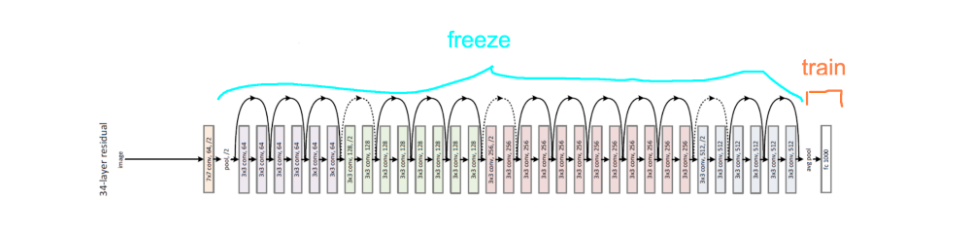   
<a href="https://neurohive.io/ru/vidy-nejrosetej/resnet-34-50-101/">Источник</a>

Если имеется больше данных (>1000), можно натренировать более глубокие слои, но менять их не слишком сильно. Например, в разделе train - полноценное обучение полносвязного слоя. В mid train - веса изменяются при помощи градиентов с небольшим коэффициентом (напр. 0.1). В low train - веса изменяются совсем немного (напр. с коэффициентом 0.01).      
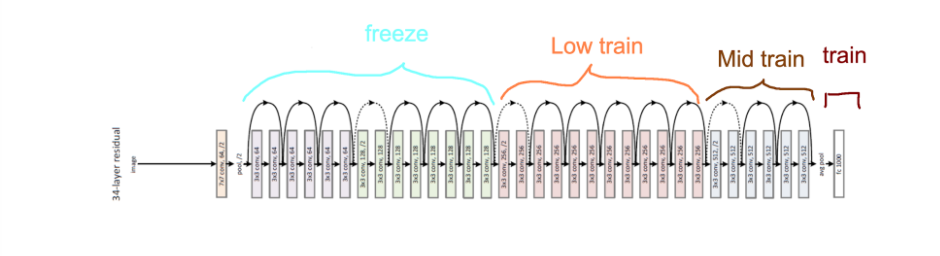       
<a href="https://neurohive.io/ru/vidy-nejrosetej/resnet-34-50-101/">Источник</a>

### LSTM. Initial points

In [ ]:
import torch
import torch.nn as nn
input_dim = 5     # Укажем размерность входного и выходного векторов
output_dim = 4
lstm = nn.LSTM(input_dim, output_dim)  # Создадим LSTM слой

batch = 100
seq_len = 20  # Размерк каждой последовательности
x = torch.randn(seq_len, batch, input_dim)    # Входное случайное значение (подобие векторизированного представления текста)
output, _ = lstm(x)
print(output.shape, x.shape)  # lstm для каждого слова в каждом батче трансформировала вектор из размерности 5 в 4

torch.Size([20, 100, 4]) torch.Size([20, 100, 5])


In [ ]:
num_layers = 2
lstm = nn.LSTM(input_dim, output_dim, num_layers)
h = torch.randn(num_layers, batch, output_dim)  # Необходимо передать hidden state для каждого слоя (num_layers) для каждого батча
c = torch.randn(num_layers, batch, output_dim)  # cell имеет такую же размерность
o, (h, c) = lstm(x, (h, c))                     # lstm возвращает output, последний hidden state и cell
print(o.shape, x.shape)

torch.Size([20, 100, 4]) torch.Size([20, 100, 5])


In [ ]:
# Обычная реккурентная сеть обрабатывает последовательности по очереди слева направо
# На практике, как правило, мы получаем output для прямого и обратного прохождения последовательности. Расширение рек.сетей bidirectional
lstm = nn.LSTM(input_dim, output_dim, num_layers, bidirectional = True)
o_b, _ = lstm(x)
print(o_b.shape, o.shape)

torch.Size([20, 100, 8]) torch.Size([20, 100, 4])


### LSTM. Векторизация FastText. Модель определения части речи слов
- Обучим модель FastText на тренировочных данных. Векторизируем слова в датасете
- Реализуем нейронную сеть, которая содержит в себе два слоя двунаправленных (bidirectional) LSTM, а также выходной полносвязный слой (FC)
- Обучим нейронную сеть и получим точность на тренировочном и тестовом датасетах (Точность на train 85%, на test 76%. Модель с 76%-й точностью может определять, к какой части речи принадлежит слово)
- Затем улучшим результат путем применения внутренних эмбеддингов. Итоговый резутльтат accuracy на train 1, на test 0.90 (При использовании трансформеров можно повысить качество практически до максимума)

In [ ]:
# !pip install conllu
# !pip install --upgrade datasets
# !pip install numpy==1.26.4
# !pip install gensim==4.3.3

In [ ]:
print(np.__version__)
print(gensim.__version__)

1.26.4
4.3.3


In [ ]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic =True

In [ ]:
# en_ewt — "English Web Treebank", содержит разметку синтаксиса из широко доступных англоязычных интернет-текстов
dataset = load_dataset("universal_dependencies", "en_ewt",  trust_remote_code=True)   # trust_remote_code=True   download_mode='force_redownload'

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['idx', 'text', 'tokens', 'lemmas', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc'],
        num_rows: 12543
    })
    validation: Dataset({
        features: ['idx', 'text', 'tokens', 'lemmas', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc'],
        num_rows: 2002
    })
    test: Dataset({
        features: ['idx', 'text', 'tokens', 'lemmas', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc'],
        num_rows: 2077
    })
})

In [ ]:
dataset["train"]

Dataset({
    features: ['idx', 'text', 'tokens', 'lemmas', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc'],
    num_rows: 12543
})

In [ ]:
print(dataset["train"][5]['text'])     # Текст пятого предложения из корпуса данных
print(dataset["train"][5]['lemmas'])   # Леммы- базовые или корневые формы слова, к которой сводятся различные его формы для облегчения анализа
print(dataset["train"][5]['deprel'])   # deprel - тип зависимостной связи между словами
print(dataset["train"][5]['upos'])     # upos - лейблы

The third was being run by the head of an investment firm.
['the', 'third', 'be', 'be', 'run', 'by', 'the', 'head', 'of', 'a', 'investment', 'firm', '.']
['det', 'nsubj:pass', 'aux', 'aux:pass', 'root', 'case', 'det', 'obl', 'case', 'det', 'compound', 'nmod', 'punct']
[8, 6, 17, 17, 16, 2, 8, 0, 2, 8, 0, 0, 1]


In [ ]:
print(dataset["train"][77]['text'])
print(dataset["train"][77]['lemmas'])
print(dataset["train"][77]['deprel'])   # deprel - тип зависимостной связи между словами
print(dataset["train"][77]['upos'])     # upos - лейблы

The prestigious IAEA (International Atomic Energy Agency) published an early report on Chernobyl which was based on information from Russian sources and stated that there was no significant health effects.
['the', 'prestigious', 'IAEA', '(', 'International', 'Atomic', 'Energy', 'Agency', ')', 'publish', 'a', 'early', 'report', 'on', 'Chernobyl', 'which', 'be', 'base', 'on', 'information', 'from', 'russian', 'source', 'and', 'state', 'that', 'there', 'be', 'no', 'significant', 'health', 'effect', '.']
['det', 'amod', 'nsubj', 'punct', 'compound', 'compound', 'compound', 'appos', 'punct', 'root', 'det', 'amod', 'obj', 'case', 'nmod', 'nsubj:pass', 'aux:pass', 'acl:relcl', 'case', 'obl', 'case', 'amod', 'nmod', 'cc', 'conj', 'mark', 'expl', 'ccomp', 'det', 'amod', 'compound', 'nsubj', 'punct']
[8, 6, 10, 1, 10, 10, 10, 10, 1, 16, 8, 6, 0, 2, 10, 11, 17, 16, 2, 0, 2, 6, 0, 9, 16, 5, 11, 16, 8, 6, 0, 0, 1]


In [ ]:
print(len(dataset["train"].features["upos"].feature.names))
print(dataset["train"].features["upos"].feature.names)

18
['NOUN', 'PUNCT', 'ADP', 'NUM', 'SYM', 'SCONJ', 'ADJ', 'PART', 'DET', 'CCONJ', 'PROPN', 'PRON', 'X', '_', 'ADV', 'INTJ', 'VERB', 'AUX']


In [ ]:
dataset["train"].features

{'idx': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'lemmas': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'upos': Sequence(feature=ClassLabel(names=['NOUN', 'PUNCT', 'ADP', 'NUM', 'SYM', 'SCONJ', 'ADJ', 'PART', 'DET', 'CCONJ', 'PROPN', 'PRON', 'X', '_', 'ADV', 'INTJ', 'VERB', 'AUX'], id=None), length=-1, id=None),
 'xpos': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'feats': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'head': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'deprel': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'deps': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'misc': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
print(dataset["train"][5]['lemmas'])
upos_labels = dataset["train"].features["upos"].feature.names
indices = dataset["train"][5]["upos"]
labels = [upos_labels[idx] for idx in indices]
print(labels)

['the', 'third', 'be', 'be', 'run', 'by', 'the', 'head', 'of', 'a', 'investment', 'firm', '.']
['DET', 'ADJ', 'AUX', 'AUX', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'NOUN', 'PUNCT']


In [ ]:
labels_list = [[upos_labels[idx] for idx in indices] for indices in dataset["train"]["upos"]]
print(labels_list[:2])

[['PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'PROPN', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT'], ['PUNCT', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'AUX', 'AUX', 'VERB', 'PRON', 'NOUN', 'ADP', 'NOUN', 'PART', 'VERB', 'PUNCT', 'PUNCT']]


In [ ]:
upos_labels_dict = dict(zip(range(len(upos_labels)), upos_labels))
print(upos_labels_dict)

{0: 'NOUN', 1: 'PUNCT', 2: 'ADP', 3: 'NUM', 4: 'SYM', 5: 'SCONJ', 6: 'ADJ', 7: 'PART', 8: 'DET', 9: 'CCONJ', 10: 'PROPN', 11: 'PRON', 12: 'X', 13: '_', 14: 'ADV', 15: 'INTJ', 16: 'VERB', 17: 'AUX'}


In [ ]:
# Разделим данные на train и test, разделим леммы и лейблы
train_data = dataset['train']
test_data = dataset['validation']

train_tokens = [[w for w in d['lemmas']] for d in train_data]
train_labels = [[w for w in d['upos']] for d in train_data]
test_tokens = [[w for w in d['lemmas']] for d in test_data]
test_labels = [[w for w in d['upos']] for d in test_data]

print(train_tokens[8:10])
print(train_labels[8:10])

[['although', 'the', 'announcement', 'be', 'probably', 'make', 'to', 'show', 'progress', 'in', 'identify', 'and', 'break', 'up', 'terror', 'cell', ',', 'I', '_', 'do', 'not', 'find', 'the', 'news', 'that', 'the', 'Baathists', 'continue', 'to', 'penetrate', 'the', 'iraqi', 'government', 'very', 'hopeful', '.'], ['it', 'remind', 'I', 'too', 'much', 'of', 'the', 'ARVN', 'officer', 'who', 'be', 'secretly', 'work', 'for', 'the', 'other', 'side', 'in', 'Vietnam', '.']]
[[5, 8, 0, 17, 14, 16, 7, 16, 0, 5, 16, 9, 16, 2, 0, 0, 1, 11, 13, 17, 7, 16, 8, 0, 5, 8, 10, 16, 7, 16, 8, 6, 0, 14, 6, 1], [11, 16, 11, 14, 14, 2, 8, 10, 0, 11, 17, 14, 16, 2, 8, 6, 0, 2, 10, 1]]


In [ ]:
print(len(train_tokens), len(train_labels)) # 12543
print(len(test_tokens), len(test_labels))   # 2002

12543 12543
2002 2002


In [ ]:
# FastText работает по chargrams, а не по словам как Word2vec
# vector_size - Размер вектора, т.е, насколько подробно представляется каждая chargrams
# window - Размер окна контекста — количество слов слева и справа от целевого слова, которое учитывается при обучении 
# min_count - Минимальное количество появлений слова в корпусе для его учета (Значение 1 - все слова, встречающиеся хотя бы один раз)
# min_n - Минимальная длина морфемных префиксов/суффиксов при формировании n-грамм в FastText (используется для учета морфологических вариаций)
# Значение min_n=1  — все n-граммы от минимальной длины
# workers - Количество потоков (процессов) для параллельного обучения, ускоряет процесс обучения на многоядерных системах
ft = FastText(sentences = train_tokens, vector_size =100, window = 5, min_count = 1, min_n =1, workers = 4)
ft

In [ ]:
print(train_tokens[130])
print(len([ft.wv[w] for w in train_tokens[130]]), [ft.wv[w] for w in train_tokens[130]][0].shape)

['the', 'tape', 'be', 'a', 'way', 'to', 'signal', 'priority', '.']
9 (100,)


In [ ]:
len([ft.wv[w] for w in train_tokens])

12543

In [ ]:
max_len = 25 # Урежем предложения. Используем только первые 25 слов (для экономии времени)
pad_inds = len(upos_labels)  # Число (18), которое будет добавлено в векторы с тегами, если длина предложения меньше max_len (25)
len(upos_labels)

18

In [ ]:
def prepare_data(all_tokens, all_labels, ft, max_len, pad_tags):
    all_tokens = [tokens[:max_len] for tokens in all_tokens]  # Урезаем до макс. длины
    all_labels = [tags[:max_len] for tags in all_labels]

    X_vecs = []
    Y_vecs = []
    for sentence, labels in zip(all_tokens, all_labels):  # Создаем матрицы / вектора
        X_vecs.append(torch.tensor(np.row_stack([ft.wv[w] for w in sentence] )))  # Матрица, где каждая строка - слово
        Y_vecs.append(torch.tensor(labels, dtype = torch.long))                   # Из массивов с матрицами и векторами создаем тензор
    # pad_sequence расширяет предложения до необходимого кол-ва элементов, дополняя нулями (25)
    X = pad_sequence(X_vecs, batch_first=True) # Возвращаемый тензор будут иметь формат (batch_size, seq_len, feature_dim)
    Y = pad_sequence(Y_vecs, batch_first=True, padding_value=pad_tags) # в качестве заполнителя Y используем pad_inds
    return X, Y

X_train, Y_train = prepare_data(train_tokens, train_labels, ft, max_len, pad_inds)
X_train.size(), Y_train.size()

(torch.Size([12543, 25, 100]), torch.Size([12543, 25]))

In [ ]:
X_test, Y_test = prepare_data(test_tokens, test_labels, ft, max_len, pad_inds)
X_test.size(), Y_test.size()

(torch.Size([2002, 25, 100]), torch.Size([2002, 25]))

In [ ]:
X_train[3, :, :]

tensor([[-0.1728,  0.6950, -0.8559,  ..., -0.2189, -0.0147,  0.3509],
        [-0.6921,  0.6569, -0.9086,  ..., -0.2048, -0.1718,  0.0770],
        [-0.1589,  0.7785, -0.8211,  ..., -0.2222,  0.0099,  0.3499],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [ ]:
Y_train[3] # pad_inds = 18

tensor([ 3,  2, 11, 17, 17, 16,  2,  3,  0,  2,  8, 10,  2,  8, 10,  1, 18, 18,
        18, 18, 18, 18, 18, 18, 18])

In [ ]:
Y_train[300]

tensor([10, 16, 11, 11, 16,  5, 10,  9, 10,  1, 11, 17, 16,  8,  0,  2,  8,  0,
         3,  0, 14,  1, 16, 14,  1])

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
bs = 128
# Объединяет входные тензоры X_train и метки Y_train в один объект. При итерировании по TensorDataset, он возвращает парные образцы
data = TensorDataset(X_train, Y_train)
# Будем использовать во время обучения как итератор. Данные по 128 шт. будут подаваться на вход модели последовательно (SequentialSampler)
dataloader = DataLoader(data, sampler=SequentialSampler(data), batch_size=bs)

In [ ]:
class BiLSTMPOSTagger(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.output_dim = output_dim
        self.input_size = input_dim

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout if n_layers > 1 else 0)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, sentence):
        # sentence = [batch_size, sent len, emb dim]
        sentence = sentence.view(sentence.shape[1], sentence.shape[0], self.input_size)
        # sentence = [sent len, batch_size, emb dim]

        outputs, (hidden, cell) = self.lstm(sentence)
        predictions = self.fc(self.dropout(outputs))

        # predictions = [sent len, batch_size, output dim]
        predictions = predictions.view(predictions.shape[1], predictions.shape[0], self.output_dim)
        # predictions = [batch_size, sent len, output dim]
        return predictions

In [ ]:
def train_on_epoch(model, dataloader, optimizer):
    model.train()  # Переводим модель в режим тренировки
    for batch in dataloader:
        batch = tuple(t.to(device) for t in batch)  # Переводим на девайс GPU
        b_input, b_tags = batch                     # Из батча получаем векторизированные предложения b_input и таргет-лейблы b_tags

        model.zero_grad()          # Обнуляем градиенты
        outputs = model(b_input)   # Запускаем обучение

        # outputs = [batch size, sent len, out dim]
        outputs = outputs.view(-1, outputs.shape[-1])   # Переводим тензор в двумерный
        # outputs = [batch size * sent len, out dim]

        # b_tags = [batch size, sent len]
        b_tags = b_tags.view(-1)   # Делаем вектор плоским
        # b_tags = [batch size * sent len]

        loss = criterion(outputs, b_tags)  # Cross-entropy на вход получает скоры для каждого класса и вектор истинных классов
        loss.backward()    # Обратное распространение ошибки
        optimizer.step()   # Обновление весов


def predict_on_dataloader(model, dataloaded):
    model.eval()   # Переводим модель в режим предсказания
    all_outputs = []
    all_tags = []
    for batch in dataloaded:
        batch = tuple(t.to(device) for t in batch)
        b_input, b_tags = batch
        outputs = model(b_input)

        outputs = outputs.view(-1, outputs.shape[-1])
        b_tags = b_tags.view(-1)

        all_outputs.append(outputs)
        all_tags.append(b_tags)

    all_outputs = torch.cat(all_outputs)  # Конкатенируем, чтобы получить результаты на всем dataloader
    all_tags = torch.cat(all_tags)

    return all_outputs, all_tags

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
Tesla T4


In [ ]:
!nvidia-smi

Fri May 16 10:32:40 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   71C    P0             33W /   70W |     996MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
INPUT_DIM = 100
HIDDEN_DIM = 128
OUTPUT_DIM = len(upos_labels)
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.25

model = BiLSTMPOSTagger(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)
model.to(device)

# Так как мы добавляли pad_inds (18) если длина предложения < max_len (25), необхожимо указать ignore_index=pad_inds,
# чтобы лосс-функуия не считала ошибку на дополненных элементах
criterion = nn.CrossEntropyLoss(ignore_index=pad_inds)
optimizer = optim.Adam(model.parameters())  # Оптимизатор Adam

In [ ]:
epochs = 80
for e in range(epochs):
    train_on_epoch(model, dataloader, optimizer)
    all_outputs, all_tags = predict_on_dataloader(model, dataloader)
    loss = criterion(all_outputs, all_tags)

    all_outputs = all_outputs.detach().cpu().numpy()
    all_tags = all_tags.detach().cpu().numpy()

    mask = all_tags != pad_inds
    loss = loss.item()/len(all_tags[mask])
    all_tags = all_tags[mask]
    all_preds = np.argmax(all_outputs, axis=1)[mask]

    if (not e % 10) or (e == epochs-1):
      print(f"{e}:\tLoss {loss}, "
            f"accuracy: {accuracy_score(all_tags, all_preds)}, "
            f"f1-macro: {f1_score(all_tags, all_preds, average='macro')}")

0:	Loss 8.51021268583764e-06, accuracy: 0.4725654857905567, f1-macro: 0.22368048505941612
10:	Loss 4.5905322189505015e-06, accuracy: 0.7098882153384127, f1-macro: 0.6228447059165423
20:	Loss 3.946524600909473e-06, accuracy: 0.7405427951726823, f1-macro: 0.6728296658020025
30:	Loss 3.5197843825629487e-06, accuracy: 0.7667426728213114, f1-macro: 0.7160504949528079
40:	Loss 3.2158878752416354e-06, accuracy: 0.7844224459151327, f1-macro: 0.7438507334927591
50:	Loss 2.959129456437925e-06, accuracy: 0.8004615983538179, f1-macro: 0.7668835124319857
60:	Loss 2.7131372322581924e-06, accuracy: 0.8156943440298092, f1-macro: 0.790576269351486
70:	Loss 2.4710999773060624e-06, accuracy: 0.834503086591402, f1-macro: 0.8138934353366067
79:	Loss 2.2637979000828354e-06, accuracy: 0.8508703631611145, f1-macro: 0.8340325927785418


In [ ]:
def count_metrics(model, dataloader):
  y_pred, y_true = predict_on_dataloader(model, dataloader)
  y_pred = y_pred.detach().cpu().numpy()
  y_true = y_true.detach().cpu().numpy()

  mask = y_true != pad_inds
  y_true = y_true[mask]
  y_pred = np.argmax(y_pred, axis=1)[mask]
  print(classification_report(y_true, y_pred))

count_metrics(model, dataloader)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75     29837
           1       0.99      1.00      1.00     19307
           2       0.91      0.88      0.89     14982
           3       0.95      0.95      0.95      3617
           4       0.97      0.78      0.87       572
           5       0.77      0.73      0.75      3961
           6       0.70      0.45      0.55     10786
           7       0.81      0.98      0.89      4880
           8       0.97      0.98      0.97     14175
           9       0.99      0.99      0.99      5746
          10       0.91      0.84      0.87     11316
          11       0.98      0.95      0.97     16717
          12       0.89      0.23      0.36       790
          13       1.00      1.00      1.00      2234
          14       0.76      0.73      0.74      8709
          15       0.98      0.67      0.80       657
          16       0.76      0.71      0.73     20370
          17       0.93    

In [ ]:
data = TensorDataset(X_test, Y_test)
test_dataloader = DataLoader(data, sampler=SequentialSampler(data), batch_size=bs)
count_metrics(model, test_dataloader)

              precision    recall  f1-score   support

           0       0.56      0.72      0.63      3773
           1       0.98      1.00      0.99      2689
           2       0.85      0.83      0.84      1795
           3       0.92      0.92      0.92       345
           4       0.76      0.47      0.58        74
           5       0.60      0.62      0.61       430
           6       0.57      0.35      0.43      1641
           7       0.76      0.93      0.83       575
           8       0.95      0.97      0.96      1730
           9       0.98      0.98      0.98       705
          10       0.76      0.61      0.68      1694
          11       0.95      0.92      0.94      2064
          12       0.60      0.06      0.11       143
          13       1.00      1.00      1.00       306
          14       0.57      0.60      0.58      1108
          15       0.93      0.46      0.62       112
          16       0.60      0.60      0.60      2535
          17       0.88    

### LSTM. Внутренняя векторизация при помощи эмбеддингов. Модель определения части речи слов

In [ ]:
# en_ewt — "English Web Treebank", содержит разметку синтаксиса из широко доступных англоязычных интернет-текстов
dataset = load_dataset("universal_dependencies", "en_ewt",  trust_remote_code=True)   #  download_mode='force_redownload'
dataset

DatasetDict({
    train: Dataset({
        features: ['idx', 'text', 'tokens', 'lemmas', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc'],
        num_rows: 12543
    })
    validation: Dataset({
        features: ['idx', 'text', 'tokens', 'lemmas', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc'],
        num_rows: 2002
    })
    test: Dataset({
        features: ['idx', 'text', 'tokens', 'lemmas', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc'],
        num_rows: 2077
    })
})

In [ ]:
print(dataset["train"][5]['text'])     # Текст пятого предложения из корпуса данных
print(dataset["train"][5]['lemmas'])   # Леммы - базовые или корневые формы слова, к которой сводятся различные его формы для облегчения анализа
print(dataset["train"][5]['deprel'])   # deprel - тип зависимостной связи между словами
print(dataset["train"][5]['upos'])     # upos - лейблы

The third was being run by the head of an investment firm.
['the', 'third', 'be', 'be', 'run', 'by', 'the', 'head', 'of', 'a', 'investment', 'firm', '.']
['det', 'nsubj:pass', 'aux', 'aux:pass', 'root', 'case', 'det', 'obl', 'case', 'det', 'compound', 'nmod', 'punct']
[8, 6, 17, 17, 16, 2, 8, 0, 2, 8, 0, 0, 1]


In [ ]:
print(len(dataset["train"].features["upos"].feature.names))
print(dataset["train"].features["upos"].feature.names)

18
['NOUN', 'PUNCT', 'ADP', 'NUM', 'SYM', 'SCONJ', 'ADJ', 'PART', 'DET', 'CCONJ', 'PROPN', 'PRON', 'X', '_', 'ADV', 'INTJ', 'VERB', 'AUX']


In [ ]:
upos_labels = dataset["train"].features["upos"].feature.names
labels_list = [[upos_labels[idx] for idx in indices] for indices in dataset["train"]["upos"]]
print(labels_list[:2])

[['PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'ADJ', 'NOUN', 'VERB', 'PROPN', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT'], ['PUNCT', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'AUX', 'AUX', 'VERB', 'PRON', 'NOUN', 'ADP', 'NOUN', 'PART', 'VERB', 'PUNCT', 'PUNCT']]


In [ ]:
upos_labels_dict = dict(zip(range(len(upos_labels)), upos_labels))
print(upos_labels_dict)

{0: 'NOUN', 1: 'PUNCT', 2: 'ADP', 3: 'NUM', 4: 'SYM', 5: 'SCONJ', 6: 'ADJ', 7: 'PART', 8: 'DET', 9: 'CCONJ', 10: 'PROPN', 11: 'PRON', 12: 'X', 13: '_', 14: 'ADV', 15: 'INTJ', 16: 'VERB', 17: 'AUX'}


In [ ]:
# Разделим данные на train и test, разделим леммы и лейблы
train_data = dataset['train']
test_data = dataset['validation']

train_tokens = [[w for w in d['lemmas']] for d in train_data]
train_labels = [[w for w in d['upos']] for d in train_data]
test_tokens = [[w for w in d['lemmas']] for d in test_data]
test_labels = [[w for w in d['upos']] for d in test_data]

print(train_tokens[8:10])
print(train_labels[8:10])

[['although', 'the', 'announcement', 'be', 'probably', 'make', 'to', 'show', 'progress', 'in', 'identify', 'and', 'break', 'up', 'terror', 'cell', ',', 'I', '_', 'do', 'not', 'find', 'the', 'news', 'that', 'the', 'Baathists', 'continue', 'to', 'penetrate', 'the', 'iraqi', 'government', 'very', 'hopeful', '.'], ['it', 'remind', 'I', 'too', 'much', 'of', 'the', 'ARVN', 'officer', 'who', 'be', 'secretly', 'work', 'for', 'the', 'other', 'side', 'in', 'Vietnam', '.']]
[[5, 8, 0, 17, 14, 16, 7, 16, 0, 5, 16, 9, 16, 2, 0, 0, 1, 11, 13, 17, 7, 16, 8, 0, 5, 8, 10, 16, 7, 16, 8, 6, 0, 14, 6, 1], [11, 16, 11, 14, 14, 2, 8, 10, 0, 11, 17, 14, 16, 2, 8, 6, 0, 2, 10, 1]]


In [ ]:
print(len(train_tokens), len(train_labels)) # 12543
print(len(test_tokens), len(test_labels))   # 2002

12543 12543
2002 2002


In [ ]:
# stemmer = PorterStemmer()
# word_to_ix = {}
# for tokens in train_tokens:
#     for word in tokens:
#         word = stemmer.stem(word)
#         if word not in word_to_ix:
#             word_to_ix[word] = len(word_to_ix)
# word_to_ix["UNK"] =  len(word_to_ix)

# def prepare_sequence(seq, to_ix):
#     stemmer = PorterStemmer()
#     stemmed_words = [stemmer.stem(w) for w in seq]
#     idxs = [to_ix[w] if w in to_ix else to_ix["UNK"] for w in stemmed_words ]
#     return torch.tensor(idxs, dtype=torch.long)

In [ ]:
word_to_ix = {}  # Создадим словарь всех слов корпуса
for tokens in train_tokens:
    for word in tokens:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
word_to_ix["UNK"] =  len(word_to_ix)

In [ ]:
print(len(word_to_ix))
print(list(word_to_ix.items())[:10])

14797
[('Al', 0), ('-', 1), ('Zaman', 2), (':', 3), ('american', 4), ('force', 5), ('kill', 6), ('Shaikh', 7), ('Abdullah', 8), ('al', 9)]


In [ ]:
max_len = 20
pad_inds = len(upos_labels_dict) # 18

def prepare_data_for_inner_embeddings(all_tokens, all_tags, word_to_ix, max_len, pad_tags):
    all_tokens = [tokens[:max_len] for tokens in all_tokens]   # Урезаем до макс. длины
    all_tags = [tags[:max_len] for tags in all_tags]

    all_ids = []
    for tokens in all_tokens:
        idxs = [word_to_ix[w] if w in word_to_ix else word_to_ix["UNK"] for w in tokens]
        idxs = torch.tensor(idxs, dtype=torch.long)
        all_ids.append(idxs)

    X_vecs = []
    Y_vecs = []

    for ids, tags in zip(all_ids, all_tags):
        X_vecs.append(torch.tensor(ids, dtype=torch.long))
        Y_vecs.append(torch.tensor(tags, dtype=torch.long))
    X = pad_sequence(X_vecs, batch_first=True, padding_value=len(word_to_ix))   # в качестве заполнителя X используем новый индекс len(word_to_ix)=20
    Y = pad_sequence(Y_vecs, batch_first=True, padding_value=pad_tags)          # в качестве заполнителя Y используем pad_tags=18

    return X, Y

X_train, Y_train = prepare_data_for_inner_embeddings(train_tokens, train_labels, word_to_ix, max_len, pad_inds)
X_train.size(), Y_train.size()

(torch.Size([12543, 20]), torch.Size([12543, 20]))

In [ ]:
X_test, Y_test = prepare_data_for_inner_embeddings(test_tokens, test_labels, word_to_ix, max_len, pad_inds)
X_test.size(), Y_test.size()

(torch.Size([2002, 20]), torch.Size([2002, 20]))

In [ ]:
print(X_train)

tensor([[    0,     1,     2,  ...,    15,    16,    12],
        [   24,    25,    26,  ...,    39, 14797, 14797],
        [   40,     3,    41,  ..., 14797, 14797, 14797],
        ...,
        [ 3375,    45,    30,  ...,    30,   206,    31],
        [   12,  4771,    14,  ...,  1148,    18,  5633],
        [  109,    30,   389,  ...,   129,    45,  1088]])


In [ ]:
print(Y_train)

tensor([[10,  1, 10,  ...,  0,  2,  8],
        [ 1,  8,  0,  ...,  1, 18, 18],
        [10,  1,  6,  ..., 18, 18, 18],
        ...,
        [14, 11, 17,  ..., 17, 14, 17],
        [ 8,  0,  2,  ...,  0,  2,  0],
        [11, 17, 14,  ...,  0, 11, 14]])


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
bs = 128
data = TensorDataset(X_train, Y_train)
dataloader = DataLoader(data, sampler=SequentialSampler(data), batch_size=bs)

In [ ]:
class BiLSTMPOSTagger(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        super().__init__()

        # padding_idx=pad_idx - это номер id "заполнителя"
        self.embedding = nn.Embedding(input_dim, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout if n_layers > 1 else 0, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, sentence):
        embs = self.embedding(sentence)
        outputs, (hidden, cell) = self.lstm(embs)
        predictions = self.fc(self.dropout(outputs))
        return predictions

In [ ]:
def train_on_epoch(model, dataloader, optimizer):
    model.train()
    for batch in dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input, b_tags = batch

        model.zero_grad()
        outputs = model(b_input)

        # outputs = [batch size, sent len, out dim]
        outputs = outputs.view(-1, outputs.shape[-1])
        # outputs = [batch size * sent len, out dim]

        # b_tags = [batch size, sent len]
        b_tags = b_tags.view(-1)
        # b_tags = [batch size * sent len]

        loss = criterion(outputs, b_tags)
        loss.backward()
        optimizer.step()


def predict_on_dataloader(model, dataloaded):
    model.eval()

    all_outputs = []
    all_tags = []
    for batch in dataloaded:
        batch = tuple(t.to(device) for t in batch)
        b_input, b_tags = batch
        outputs = model(b_input)

        outputs = outputs.view(-1, outputs.shape[-1])
        b_tags = b_tags.view(-1)

        all_outputs.append(outputs)
        all_tags.append(b_tags)

    all_outputs = torch.cat(all_outputs)
    all_tags = torch.cat(all_tags)

    return all_outputs, all_tags

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
INPUT_DIM = len(word_to_ix)+1
EMBEDDING_DIM = 100
HIDDEN_DIM = 128
OUTPUT_DIM = len(upos_labels_dict)
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.25
PAD_IDX = len(word_to_ix)

model = BiLSTMPOSTagger(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX)
model.to(device)

criterion = nn.CrossEntropyLoss(ignore_index=pad_inds)
optimizer = optim.Adam(model.parameters())

In [ ]:
epochs = 50
for e in range(epochs):
    train_on_epoch(model, dataloader, optimizer)

    all_outputs, all_tags = predict_on_dataloader(model, dataloader)
    loss = criterion(all_outputs, all_tags).item()
    all_outputs = all_outputs.detach().cpu().numpy()
    all_tags = all_tags.detach().cpu().numpy()

    mask = all_tags != pad_inds
    loss = loss/len(all_tags[mask])
    all_tags = all_tags[mask]
    all_preds = np.argmax(all_outputs, axis=1)[mask]

    if (not e % 5) or (e == epochs - 1):
        print(f"{e}:\tLoss {loss}, "
          f"accuracy: {accuracy_score(all_tags, all_preds)}, "
          f"f1-macro: {f1_score(all_tags, all_preds, average='macro')}")

0:	Loss 5.122201252943372e-06, accuracy: 0.7286586297285242, f1-macro: 0.5638930300005877
5:	Loss 1.2001609245172236e-06, accuracy: 0.9388980881211774, f1-macro: 0.900212024844191
10:	Loss 3.8936343326408126e-07, accuracy: 0.9822804455551414, f1-macro: 0.9657033133994302
15:	Loss 1.4258138271154315e-07, accuracy: 0.9938898088121177, f1-macro: 0.9881437245573684
20:	Loss 5.124605582402717e-08, accuracy: 0.9980508490110656, f1-macro: 0.9962985909331457
25:	Loss 2.0494802849566236e-08, accuracy: 0.9992912178222056, f1-macro: 0.9988988619133856
30:	Loss 8.554406776716433e-09, accuracy: 0.9998289146467393, f1-macro: 0.9997521878576952
35:	Loss 6.281242568096091e-09, accuracy: 0.9998655757938666, f1-macro: 0.9998246955303336
40:	Loss 4.29799597958229e-09, accuracy: 0.9998716859850545, f1-macro: 0.9997533996240262
45:	Loss 3.0847840966132213e-09, accuracy: 0.999896126749806, f1-macro: 0.9998502920371757
49:	Loss 4.076992095806189e-09, accuracy: 0.9998044738819878, f1-macro: 0.9996968164355218

In [ ]:
def count_metrics(model, dataloader):
  y_pred, y_true = predict_on_dataloader(model, dataloader)

  y_pred = y_pred.detach().cpu().numpy()
  y_true = y_true.detach().cpu().numpy()

  mask = y_true != pad_inds
  y_true = y_true[mask]
  y_pred = np.argmax(y_pred, axis=1)[mask]

  print(classification_report(y_true, y_pred))

In [ ]:
count_metrics(model, dataloader)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26902
           1       1.00      1.00      1.00     16858
           2       1.00      1.00      1.00     13474
           3       1.00      1.00      1.00      3331
           4       1.00      1.00      1.00       518
           5       1.00      1.00      1.00      3628
           6       1.00      1.00      1.00      9892
           7       1.00      1.00      1.00      4427
           8       1.00      1.00      1.00     12937
           9       1.00      1.00      1.00      5169
          10       1.00      1.00      1.00     10461
          11       1.00      1.00      1.00     15528
          12       1.00      1.00      1.00       736
          13       1.00      1.00      1.00      2116
          14       1.00      1.00      1.00      7984
          15       1.00      1.00      1.00       648
          16       1.00      1.00      1.00     18679
          17       1.00    

In [ ]:
data = TensorDataset(X_test, Y_test)
test_dataloader = DataLoader(data, sampler=SequentialSampler(data), batch_size=bs)
count_metrics(model, test_dataloader)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      3490
           1       0.99      0.99      0.99      2432
           2       0.93      0.96      0.94      1655
           3       0.51      0.87      0.64       318
           4       0.86      0.53      0.66        72
           5       0.87      0.83      0.85       409
           6       0.85      0.87      0.86      1531
           7       0.97      0.94      0.95       543
           8       0.98      0.99      0.99      1603
           9       0.99      0.99      0.99       637
          10       0.89      0.50      0.64      1582
          11       0.99      0.99      0.99      1973
          12       0.32      0.43      0.37       134
          13       1.00      1.00      1.00       294
          14       0.89      0.86      0.87      1044
          15       0.95      0.71      0.81       110
          16       0.92      0.90      0.91      2377
          17       0.97    

### BERT

Благодаря Bert transfer-learning стал доступен в NLP. Bert построен на энкодере трансформера, обучен на двух задачах: Masked Language Modeling (MLM) и Next Sentence Prediction (NSP). В задаче MLM мы маскируем некоторые токены и просим модель восстановить их, в задаче NSP мы подаём на вход модели два предложения, и модель должна определить, является ли второе предложение продолжением первого.    
Некоторые модификации BERT:
   
   - AlBert (уменьшенная версия Bert)   
   - RoBertа (Bert c оптимизированными гиперпараметрами)   
   - RuBerta (Bert, предобученый на русском языке)   
   - Big bird (Модель получила название в честь Большой Птицы из «Улицы Сезам»)   
   - GPT-3 (Generative Pre-trained Transformer. Хотя формально GPT-1 появилось раньше, чем Bert, в GPT-2 уже использовались идеи Bert)

### HuggingFace   
Для решения многих задач в HuggingFace уже есть предобученные модели и готовые «пайплайны». Например, мы можем использовать их для:   
- sentiment-analysis  
- question-answering   
- summarization  
- и др.

In [6]:
import transformers
from transformers import pipeline
transformers.__version__

'4.51.3'

In [32]:
nlp = pipeline("sentiment-analysis")
result = nlp("I love it")[0]
print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


label: POSITIVE, with score: 0.9999


In [33]:
nlp

In [34]:
nlp("I love it")

[{'label': 'POSITIVE', 'score': 0.9998799562454224}]

In [18]:
nlp = pipeline("question-answering")

context = r"""Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune a model
on a SQuAD task, you may leverage the examples/pytorch/question-answering/run_squad.py script."""

result = nlp(question="What is extractive question answering?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


Answer: 'the task of extracting an answer from a text given a question', score: 0.6177, start: 33, end: 94


In [19]:
result

{'score': 0.6177275776863098,
 'start': 33,
 'end': 94,
 'answer': 'the task of extracting an answer from a text given a question'}

In [20]:
result = nlp(question="What is a good example of a question answering dataset?", context=context)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: 'SQuAD dataset', score: 0.5152, start: 146, end: 159


In [27]:
nlp = pipeline("ner") # Named-entity recognition 
sequence = """Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very close to the Manhattan Bridge which is visible from the window."""
for res in nlp(sequence):
  print(res["word"], res["entity"])

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


Hu I-ORG
##gging I-ORG
Face I-ORG
Inc I-ORG
New I-LOC
York I-LOC
City I-LOC
D I-LOC
##UM I-LOC
##BO I-LOC
Manhattan I-LOC
Bridge I-LOC


In [28]:
nlp = pipeline("summarization")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks
of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false
statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment
further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York
subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time,
she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
print(nlp(ARTICLE, max_length=130, min_length=30, do_sample=False))

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cpu


[{'summary_text': ' Liana Barrientos pleaded not guilty to two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 .'}]


In [31]:
nlp = pipeline("translation_en_to_de")
print(nlp("Hugging Face is a technology company based in New York and Paris", max_length=40))

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


[{'translation_text': 'Hugging Face ist ein Technologieunternehmen mit Sitz in New York und Paris.'}]


### RuGPT-3

In [1]:
import transformers
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def load_tokenizer_and_model(model_name_or_path):   # Загружаем токенизатор и модель из хранилища
  return GPT2Tokenizer.from_pretrained(model_name_or_path), GPT2LMHeadModel.from_pretrained(model_name_or_path).cuda()

tok, model = load_tokenizer_and_model("sberbank-ai/rugpt3medium_based_on_gpt2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

In [4]:
GPT2Tokenizer.from_pretrained("sberbank-ai/rugpt3medium_based_on_gpt2")

GPT2Tokenizer(name_or_path='sberbank-ai/rugpt3medium_based_on_gpt2', vocab_size=50257, model_max_length=2048, is_fast=False, padding_side='left', truncation_side='left', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	4: AddedToken("<mask>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [5]:
GPT2LMHeadModel.from_pretrained("sberbank-ai/rugpt3medium_based_on_gpt2")

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(2048, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=3072, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=1024)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=4096, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50257, bias=False)
)

In [6]:
text = "Александр Сергеевич Пушкин родился в "
input_ids = tok.encode(text, return_tensors="pt").cuda()
print(input_ids)

tensor([[28810, 20857, 20068,  8542,   282,   225]], device='cuda:0')


In [8]:
out = model.generate(input_ids.cuda())
print(out)

tensor([[28810, 20857, 20068,  8542,   282,   225,  1281,  7703,  1045,   282,
           225, 12825,   225,  8993,  1880,   225, 44208, 16091,    18,   225,
           365,   225,  1281,  7703,  1045,   225]], device='cuda:0')


In [9]:
generated_text = list(map(tok.decode, out))[0]
print(generated_text)

Александр Сергеевич Пушкин родился в  1837 году в  селе  Михайловское  Тульской губернии.  В  1837 году 


do_sample=True - Включает использование случайной выборки для генерации текста. Модель выбирает слова не только с наибольшей вероятностью, а с учетом распределения вероятностей, делая генерацию более разнообразной и непредсказуемой.

max_length=100 - Максимальная длина сгенерированного текста в токенах. Модель остановится, когда достигнет 100 токенов.

repetition_penalty=5.0 - penalty за повторение одинаковых последовательностей. Более высокое значение снижает вероятность повторения одних и тех же фраз или слов, делая текст более разнообразным.

top_k=5 - Ограничение выбора следующего слова к топ-5 наиболее вероятных вариантов. Это помогает сохранять баланс между случайностью и релевантностью.

top_p=0.95 - Нуклеотидное отсечение (nucleus sampling) - модель выбирает следующую часть из минимального набора слов, сумма вероятностей которых составляет не менее 0.95. Это способствует разнообразной генерации, исключая маловероятные слова.

temperature=1 - Регулирует "жесткость" распределения вероятностей. Значение 1 означает стандартное, сбалансированное распределение. При увеличении температуры (например, 1.2) генерация становится более случайной, при меньшем — более детерминированной.

num_beams=None - Параметр, который управляет лучевым поиском (beam search), алгоритмом, используемым для генерации текста. Он определяет число альтернативных вариантов (лучей), которые модель рассматривает одновременно при выборе следующего слова или токена. В данном случае оно отключено (num_beams=None), и модель использует случайную выборку sampling вместо поиска по лучам. При указании num_beams > 1 модель использует поиск по лучам. Вместо того чтобы выбирать только наиболее вероятное следующее слово для каждого шага, она рассматривает несколько вариантов ("лучей") одновременно, расширяет их на следующем шаге, а затем оставляет только лучшие из них по вероятности. В конце выбирается самый вероятный из финальных вариантов. Большое значение (например, 10-20) — обеспечивает более качественные и связные тексты, особенно при сложных задачах, но требует больше ресурсов. (При num_beams=None и do_sample=True как правило получаем более разнообразные результаты, хотя иногда и менее логичные по сравнению с beam search).

no_repeat_ngram_size=3 - Предупреждает повторение одинаковых последовательностей из 3 токенов. Это помогает избегать повторяющихся фраз в сгенерированном тексте.

In [17]:
# Функция для автоматического перевода текста в id, вызыва генерации от модели и преобразования результата обратно в строку
def generate(model, tok, text,
             do_sample=True, max_length=100, repetition_penalty=5.0,
             top_k=5, top_p=0.95, temperature=1,
             num_beams=None, no_repeat_ngram_size=3):
  input_ids = tok.encode(text, return_tensors="pt").cuda()
  out = model.generate(input_ids.cuda(), max_length=max_length, repetition_penalty=repetition_penalty,
                       do_sample=do_sample, top_k=top_k, top_p=top_p, temperature=temperature,
                       num_beams=num_beams, no_repeat_ngram_size=no_repeat_ngram_size)
  return list(map(tok.decode, out))

generated = generate(model, tok, "Александр Сергеевич Пушкин родился в ")
generated[0]

'Александр Сергеевич Пушкин родился в  Петербурге 27 января 1799 года.\nВ день смерти поэта его прах был перевезен с острова Святой Елены на родину, а затем перезахоронен близ села Михайловское (ныне - город Ломоносов Ленинградской области). По завещанию Александра Сергеевича тело великого писателя было погребено рядом со своей женой Татьяной Лариной и детьми: Николаем Александровичем Пушкиным-сыном, Натальей Николаевною Пушкиной – племянницей автора «Евгения Оне'

**Решение задач**

In [27]:
text = 'Мои любимые фильмы — "Матрица", "Олдбой", "'
generated = generate(model, tok, text)
print(generated[0])

Мои любимые фильмы — "Матрица", "Олдбой", "Крепкий орешек". 

 В этой статье я хочу рассказать Вам о фильме Матрицы, который произвел на меня неизгладимое впечатление и оставил очень яркие впечатления.  Фильм снят по мотивам одноименного комикса от Marvel Comics в жанре научной фантастики с элементами мистики (в частности это касается сюжета). [...] Далее → http://www1september-magazine/article2187305


In [19]:
model

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(2048, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=3072, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=1024)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=4096, nx=1024)
          (c_proj): Conv1D(nf=1024, nx=4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50257, bias=False)
)

In [28]:
generated = generate(model, tok, text, max_length=25)
print(generated[0])

Мои любимые фильмы — "Матрица", "Олдбой", "Супер Майк".
Фильм о любви,


In [29]:
generated = generate(model, tok, text, max_length=25)
print(generated[0])

Мои любимые фильмы — "Матрица", "Олдбой", "Пятый элемент".
"Секс в большом городе


In [30]:
text = 'Я люблю советские комедии: "Приключения Шурика", "Собака на сене", "'
generated = generate(model, tok, text, max_length=25)
print(generated[0])

Я люблю советские комедии: "Приключения Шурика", "Собака на сене", "Кавказская пленница,


In [32]:
generated = generate(model, tok, text, max_length=25)
print(generated[0])

Я люблю советские комедии: "Приключения Шурика", "Собака на сене", "Иван Васильевич меняет профессию".


In [55]:
text = 'Тем людям, кому нравится Billie Eilish, также понравятся песни '
generated = generate(model, tok, text, max_length=25)
print(generated[0])

Тем людям, кому нравится Billie Eilish, также понравятся песни  The Beatles "Let it Be"


In [61]:
text = 'Тем людям, кому нравится Billie Eilish, также понравятся песни '
generated = generate(model, tok, text, max_length=30)
print(generated[0])

Тем людям, кому нравится Billie Eilish, также понравятся песни  The Rolling Stones.
В этом году в альбом вошли:


In [63]:
text = "Напиши комментарий под видео.\nОпять какой-то челлендж"
generated = generate(model, tok, text, max_length=100)
print(generated[0])

Напиши комментарий под видео.
Опять какой-то челлендж? Или это просто попытка привлечь внимание к себе и своей персоне, а не что то серьезное... Не надо ничего писать - все равно никто его читать на этот раз точно будет.... А вообще я считаю так: если человек пишет в комментариях "Я люблю тебя", значит ему действительно нравится эта песня или он считает ее очень популярной у людей с таким же именем (имени) как имя исполнителя песни! Если вы пишете о каком


In [42]:
text = "Напиши отзыв о стиральной машине. Данная модель стиральной машины"
generated = generate(model, tok, text, max_length=100)
print(generated[0])

Напиши отзыв о стиральной машине. Данная модель стиральной машины, по отзывам пользователей является одной из лучших на рынке бытовой техники и пользуется большой популярностью у потребителей в нашей стране.
Вариант с "неудобной" панелью управления - не лучший вариант: если вы пользуетесь ей редко или же вам просто лень ее открывать вручную (вдруг она сломалась), то лучше выбрать более функциональную машину без этой функции; например есть модели машинок-автомат для кухни со встроенным


**Обучение**

In [3]:
!git clone  https://github.com/sberbank-ai/ru-gpts

fatal: destination path 'ru-gpts' already exists and is not an empty directory.


In [4]:
!wget -O small_train.txt https://www.dropbox.com/s/6928fd1e3n3h2hz/small_train.txt?dl=0
!wget -O small_test.txt https://www.dropbox.com/s/6928fd1e3n3h2hz/small_test.txt?dl=0

--2025-05-17 13:30:20--  https://www.dropbox.com/s/6928fd1e3n3h2hz/small_train.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/nlpwm6ki1xhji4j7c72j0/small_train.txt?rlkey=otqsj4kw5j4scmdalnevrq365&dl=0 [following]
--2025-05-17 13:30:20--  https://www.dropbox.com/scl/fi/nlpwm6ki1xhji4j7c72j0/small_train.txt?rlkey=otqsj4kw5j4scmdalnevrq365&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1fd95bc43a237f7fb5a723cb35.dl.dropboxusercontent.com/cd/0/inline/Cp3D5eXHfBCpnKUJFcaZe4eL858FuxM-mhRUz5KYOpUmqdsQnSoY3ciGXsiEtluz8kz6Zmj1w9YnQeJjjnFFOQgSXH5XuCXWu9R4-x2PEiI5adMx8GdiAR7UawZjhlRZ1yTWRunrmYxxFOEwyYpqoL2y/file# [following]
--2025-05-17 13:30:21--  https://uc1fd95bc43a237f7fb5a723cb35.dl.dropboxuser

In [5]:
!cat small_train.txt

Декабрь - шапка зимы, июль - макушка лета.
Новый год - к весне поворот.
Январь - году начало, зиме середина.
В феврале зима с весной встретятся впервой.
С берега море красиво, а с моря - берег красив.
Сугробы снега на полях - урожай зерна в закромах.
Зима спросит, что летом припасено.
Зимой волка бойся, а летом мухи.
Зимой солнце сквозь слезы смеется.
Мороз и железо рвет, и на лету птицу бьет.
Много снега - много хлеба, много воды - много травы.
Весна красна, да голодна; осень дождлива, да сыта.
Красна весна цветами, осень - снопами.
Весна да осень - на дню погод восемь.
Весенний дождь растит, осенний гноит.
Где в апреле река, там в июле лужица.
Летняя неделя дороже зимней.
Лето - припасиха, а зима - подбериха.
Лето собирает, а зима подъедает.
Осенью и воробей богат.
Осенью скот жиреет, человек добреет.
Сентябрь кафтан с плеч срывает, тулуп надевает.
Октябрь ни колеса ни полоза не любит.
В октябре с солнцем распрощайся, ближе к печке подбирайся.
В ноябре зима с осенью борется.
Ноябрь -

In [6]:
!cat small_test.txt

Декабрь - шапка зимы, июль - макушка лета.
Новый год - к весне поворот.
Январь - году начало, зиме середина.
В феврале зима с весной встретятся впервой.
С берега море красиво, а с моря - берег красив.
Сугробы снега на полях - урожай зерна в закромах.
Зима спросит, что летом припасено.
Зимой волка бойся, а летом мухи.
Зимой солнце сквозь слезы смеется.
Мороз и железо рвет, и на лету птицу бьет.
Много снега - много хлеба, много воды - много травы.
Весна красна, да голодна; осень дождлива, да сыта.
Красна весна цветами, осень - снопами.
Весна да осень - на дню погод восемь.
Весенний дождь растит, осенний гноит.
Где в апреле река, там в июле лужица.
Летняя неделя дороже зимней.
Лето - припасиха, а зима - подбериха.
Лето собирает, а зима подъедает.
Осенью и воробей богат.
Осенью скот жиреет, человек добреет.
Сентябрь кафтан с плеч срывает, тулуп надевает.
Октябрь ни колеса ни полоза не любит.
В октябре с солнцем распрощайся, ближе к печке подбирайся.
В ноябре зима с осенью борется.
Ноябрь -

In [7]:
!mkdir models/

mkdir: cannot create directory ‘models/’: File exists


In [13]:
!export PYTHONPATH=${PYTHONPATH}:/ru-gpts/
!CUDA_VISIBLE_DEVICES=0 python ru-gpts/pretrain_transformers.py \
    --output_dir=models/proverbs \
    --model_type=gpt2 \
    --model_name_or_path=sberbank-ai/rugpt3small_based_on_gpt2 \
    --do_train \
    --train_data_file=small_train.txt \
    --do_eval \
    --eval_data_file=small_test.txt \
    --per_gpu_train_batch_size 1 \
    --gradient_accumulation_steps 1 \
    --num_train_epochs 5 \
    --block_size 10 \   # block_size 2048
    --overwrite_output_dir

In [14]:
!python ru-gpts/generate_transformers.py \
    --model_type=gpt2 \
    --model_name_or_path=models/proverbs \
    --k=5 \
    --p=0.95 \
    --length=10 \
    --repetition_penalty=5

# 2. NLP. Методы предобработки текста      
    2.1 Различные методы предобработки текста    
    2.2 Библиотека Natasha       
    2.3 Классификация текста простыми методами без предобработки и после лемматизации  

*Основные задачи NLP:*   
- Keyword Extraction
- Верификация
- Aspect-based sentiment analysis
- Relation extraction
- Суммаризация текста
- Ответы на вопросы
- Чат-боты и диалоговые системы
- Перевод
- Генерация текста


## 2.1 Различные методы предобработки текста

**bag-of-words**         
Самый простой способ перевода текста в вектор. В этой модели текст (одно предложение или весь документ) представляется в виде мешка его слов (мультимножества)без какого-либо учёта грамматики и порядка слов, но с сохранением информации об их количестве.

In [ ]:
# bag-of-words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = ['This is the first document.',
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?']
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())  # Как выглядит словарь
X

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [ ]:
# vectorizer в результате возвращает не numpy array, a объект разрежённой матрицы. Но его можно трансформировать в array методом toarray
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


**TF-IDF**   
Метод учитывает важность слов. Для каждого слова в документах подсчитывается его tf (text frequency) - показатель, отражающий сколько раз слово встретилось в документе (это то же самое число, которое мы получаем в мешке слов). Далее этот показатель умножается его на логарифм от idf (inverse document frequency), где idf — это количество всех документов, поделённое на количество документов, в которых встречается данное слово.       
   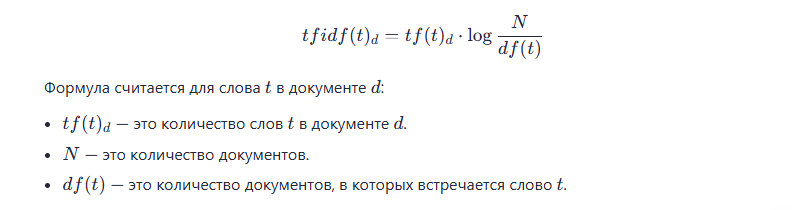    
   После того как мы получаем вектор для всех слов в словаре, обычно происходит нормализация значений:   
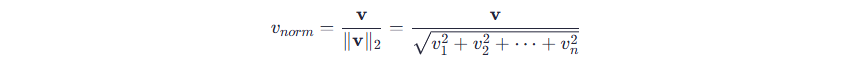    
Существует несколько вариаций формулы, чтобы избежать обнуления, деления на ноль или взятия логарифма нуля. Например:
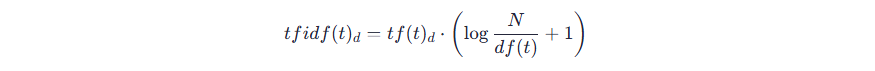  


**У методов bag-of-words и tf-idf есть несколько минусов**:
   
   - В реальной задаче, как правило, десятки тысяч слов.   
   - Документы не всегда могут быть большими, а для маленьких предложений векторы в основном будут содержать нули.   
   - Эти методы не учитывают взаимное расположение и порядок слов!

**Word2Vec**     
— общее название для совокупности моделей на основе искусственных нейронных сетей, предназначенных для получения векторных представлений слов на естественном языке. Простой алгоритм выглядит следующим образом: на основе корпуса текстов создаётся матрица размером количество слов на количество пространства смыслового вектора и заполняется случайными значениями. Эта матрица содержит строки с векторным представлением слова. Далее обучается нейронная сеть: берётся слово из предложения, подаётся на вход нейронной сети. Сеть предсказывает, какие другие слова были рядом с этим словом (контекст слова). Или наоборот: берётся контекст слова, нейронная сеть предсказывает, для какого слова взят этот контекст. Word2Vec до сих пор применяется, однако у него есть достаточно большой минус: Word2Vec не способен сгенерировать вектор для слова, которое отсутствовало в обучающем датасете.   

**FastText**    
— учится создавать векторы для частей слова (charagram). Когда на вход передаётся слово, которого не было в обучающей выборке, FastText делит его на части и уже на их основании получает вектор слова.

In [ ]:
# Получим значения tf-idf. Посчитаем tf при помощи CountVectorizer, затем idf с TfidfTransformer
# То же самое можно сделать при помощи одного TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
vectorizer = CountVectorizer()
corpus = ['This is the first document.',
           'This is the second second document.',
           'And the third one.',
           'Is this the first document?']
X = vectorizer.fit_transform(corpus)
X = X.toarray()
print(vectorizer.get_feature_names_out())
X

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [ ]:
transformer = TfidfTransformer(smooth_idf=False)  # idf
tfidf_matrix = transformer.fit_transform(X)
print(transformer.idf_)  # Посмотрим значения
tfidf_matrix

[2.38629436 1.28768207 1.69314718 1.28768207 2.38629436 2.38629436
 1.         2.38629436 1.28768207]


<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [ ]:
print(tfidf_matrix.toarray().shape)
tfidf_matrix.toarray()

(4, 9)


array([[0.        , 0.43306685, 0.56943086, 0.43306685, 0.        ,
        0.        , 0.33631504, 0.        , 0.43306685],
       [0.        , 0.24014568, 0.        , 0.24014568, 0.        ,
        0.89006176, 0.18649454, 0.        , 0.24014568],
       [0.56115953, 0.        , 0.        , 0.        , 0.56115953,
        0.        , 0.23515939, 0.56115953, 0.        ],
       [0.        , 0.43306685, 0.56943086, 0.43306685, 0.        ,
        0.        , 0.33631504, 0.        , 0.43306685]])

**Токенизация (nltk)**

In [ ]:
import nltk
nltk.download('punkt_tab')
text = '''Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years
            to archeological discoveries in the Middle East. It is a two player game where each player has fifteen checkers
            which move between twenty-four points according to the roll of two dice.'''
words = nltk.word_tokenize(text)
print(words)

['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.', 'Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.', 'It', 'is', 'a', 'two', 'player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**Лемматизация**     
—  процесс приведения слова к его начальной словарной форме -лемме. Это очень дорогая операция в вычислительном плане.   
Существует альтернатива дорогой лемматизации - **стемминг** (stemming). Стемминг не переводит слова в первичную словоформу. Для русского и английского языков стемминг обычно просто отбрасывает окончания. Таким образом стеммер работает гораздо быстрее, но он не справится с такими аспектамии языка как неправильные глаголы (в англ), в отличие от лемматизатора.   

Существует большое количество библиотек, которые позволяют проводить морфологический анализ текста на любом языке.

In [ ]:
import pymorphy2
pymorphy2.__version__   #pymorphy2 0.9.1,   Python 3.12.7
# !pip install pymorphy2[fast]
# !pip install -U pymorphy2-dicts-ru
# !pip install -U pymorphy2-dicts-uk

'0.9.1'

In [ ]:
morph = pymorphy2.MorphAnalyzer()
words = ['Майкл', 'любил', 'тренировки', 'в', 'зале']
[morph.parse(w)[0].normal_form for w in words]

['майкл', 'любить', 'тренировка', 'в', 'зал']

In [ ]:
import pymystem3
from pymystem3 import Mystem

mystem = Mystem()
text = 'Майкл любил тренировки в зале'
mystem.lemmatize(text.lower())

['майкл', ' ', 'любить', ' ', 'тренировка', ' ', 'в', ' ', 'зал', '\n']

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
sentence1 = "The striped bats are hanging on their feet for best"
sentence2 = 'Майкл любил тренировки в зале'
word_list1 = nltk.word_tokenize(sentence1)
word_list2 = nltk.word_tokenize(sentence2)
print(word_list1)
print(word_list2)
print()

lemmatized_output1 = ' '.join([lemmatizer.lemmatize(w) for w in word_list1])
lemmatized_output2 = ' '.join([lemmatizer.lemmatize(w) for w in word_list2])
print(lemmatized_output1)
print(lemmatized_output2)

['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']
['Майкл', 'любил', 'тренировки', 'в', 'зале']

The striped bat are hanging on their foot for best
Майкл любил тренировки в зале


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger_eng')

def get_wordnet_pos(word): # Функция переводит название части речи из формата NLTK в формат WordNet
    # nltk.pos_tag возвращает название части речи в формате NLTK. Но WordNetLemmatizer принимает на вход название частей речи в формате WordNet
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
sentence = "The striped bats are hanging on their feet for best"
print(sentence)

lemmatized_output = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])
print(lemmatized_output)

The striped bats are hanging on their feet for best
The strip bat be hang on their foot for best


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Лемматизация - очень дорогая операция в вычислительном плане.   
Существует альтернатива дорогой лемматизации - **стемминг** (stemming). Стемминг не переводит слова в первичную словоформу. Для русского и английского языков стемминг обычно просто отбрасывает окончания. Таким образом, стеммер работает гораздо быстрее, но он не справится с такими аспектамии языка как неправильные глаголы (в англ.), в отличие от лемматизатора.

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
sentence = "The striped bats are hanging on their feet for best"
print(' '.join([stemmer.stem(w) for w in nltk.word_tokenize(sentence)]))

the stripe bat are hang on their feet for best


**Стоп-слова**   
— слова, которые удаляются из текста. Как правило, это наиболее частотные слова, однако под разные задачи иногда требуется удалять разные слова. Например, при проведении классификации отзывов пользователей на какой-то товар частица «не» может указывать на то, что пользователю товар "не понравился".

In [ ]:
# Английские стоп-слова из nltk
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Русские стоп-слова из nltk
print(stopwords.words("russian"))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

## 2.2 Библиотека Natasha       

Natasha - набор качественных открытых инструментов для задач обработки естественного русского языка. Библиотека решает все базовые задачи NLP: сегментация на токены и предложения, морфологический и синтаксический анализ, лемматизация, извлечение именованных сущностей.

Фреймворк объединяет под одним интерфейсом другие библиотеки проекта:

- Razdel — сегментация текста на предложения и токены;
- Navec — качественный компактные эмбеддинги;
- Slovnet — современные компактные модели для морфологии, синтаксиса, NER;
- Yargy — правила и словари для извлечения структурированной информации;
- Ipymarkup — визуализация NER и синтаксической разметки;
- Corus — коллекция ссылок на публичные русскоязычные датасеты;
- Nerus — большой корпус с автоматической разметкой именованных сущностей, морфологии и синтаксиса.

In [126]:
import natasha
from natasha import Segmenter, NewsEmbedding, NewsMorphTagger, NewsSyntaxParser, Doc
from natasha import NewsNERTagger, MorphVocab, PER, NamesExtractor

In [115]:
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)

text = 'Лев Толстой, творчество которого знаменито во всём мире, родился 28 августа 1828 года в деревне Ясная Поляна, он состоял в различных литературных объединениях, например, в Обществе любителей русской словесности'
doc = Doc(text)
print(type(doc))
print(doc)

<class 'natasha.doc.Doc'>
Doc(text='Лев Толстой, творчество которого знаменито во всё...)


In [116]:
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)

sent = doc.sents[0]
sent

DocSent(stop=210, text='Лев Толстой, творчество которого знаменито во всё..., tokens=[...])

In [117]:
sent.morph.print()

                 Лев PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
             Толстой PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
                   , PUNCT
          творчество NOUN|Animacy=Inan|Case=Nom|Gender=Neut|Number=Sing
            которого PRON|Case=Gen|Gender=Masc|Number=Sing
           знаменито VERB|Aspect=Perf|Gender=Neut|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
                  во ADP
                всём DET|Case=Loc|Gender=Masc|Number=Sing
                мире NOUN|Animacy=Inan|Case=Loc|Gender=Masc|Number=Sing
                   , PUNCT
             родился VERB|Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Mid
                  28 ADJ
             августа NOUN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
                1828 ADJ
                года NOUN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
                   в ADP
             деревне NOUN|Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing
              

In [118]:
sent.syntax.print()

    ┌────────► Лев          nsubj
    │          Толстой      
    │   ┌────► ,            punct
    │   │ ┌►┌─ творчество   nsubj
    │   │ │ └► которого     nmod
    │ ┌─└─└─── знаменито    
    │ │   ┌──► во           case
    │ │   │ ┌► всём         amod
    │ └──►└─└─ мире         obl
┌──►│          ,            punct
│   └───────┌─ родился      
│       ┌─┌─└► 28           obl
│       │ └──► августа      flat
│       │   ┌► 1828         amod
│       └──►└─ года         nmod
│           ┌► в            case
│       ┌►┌─└─ деревне      obl
│       │ │ ┌► Ясная        amod
│       │ └►└─ Поляна       appos
│ ┌────►│      ,            punct
│ │     │   ┌► он           nsubj
│ │ ┌─┌─└───└─ состоял      
│ │ │ │ ┌────► в            case
│ │ │ │ │ ┌──► различных    amod
│ │ │ │ │ │ ┌► литературных amod
│ │ │ └►└─└─└─ объединениях obl
│ │ │   ┌────► ,            punct
│ │ │   │ ┌►┌─ например     parataxis
│ │ │   │ │ └► ,            punct
│ │ │   │ │ ┌► в            case
└─└─└──►└─└─└─ О

In [119]:
# Модуль извлечения именованных сущностей не зависит от результатов морфологического и синтаксического разбора, его можно использовать отдельно
ner_tagger = NewsNERTagger(emb)
doc.tag_ner(ner_tagger)
doc.ner.print()

Лев Толстой, творчество которого знаменито во всём мире, родился 28 
PER────────                                                         
августа 1828 года в деревне Ясная Поляна, он состоял в различных 
                            LOC─────────                         
литературных объединениях, например, в Обществе любителей русской 
                                       ORG────────────────────────
словесности
───────────


In [121]:
# Natasha решает задачу лемматизации, использует Pymorphy2 и результаты морфологического разбора
morph_vocab = MorphVocab()
for token in doc.tokens:
    token.lemmatize(morph_vocab)
token

DocToken(start=199, stop=210, text='словесности', id='1_34', head_id='1_32', rel='nmod', pos='NOUN', feats=<Inan,Gen,Fem,Sing>, lemma='словесность')

In [122]:
{_.text: _.lemma for _ in doc.tokens}

{'Лев': 'лев',
 'Толстой': 'толстой',
 ',': ',',
 'творчество': 'творчество',
 'которого': 'который',
 'знаменито': 'знаменитый',
 'во': 'в',
 'всём': 'весь',
 'мире': 'мир',
 'родился': 'родиться',
 '28': '28',
 'августа': 'август',
 '1828': '1828',
 'года': 'год',
 'в': 'в',
 'деревне': 'деревня',
 'Ясная': 'ясный',
 'Поляна': 'поляна',
 'он': 'он',
 'состоял': 'состоять',
 'различных': 'различный',
 'литературных': 'литературный',
 'объединениях': 'объединение',
 'например': 'например',
 'Обществе': 'общество',
 'любителей': 'любитель',
 'русской': 'русский',
 'словесности': 'словесность'}

In [123]:
doc.tokens

[DocToken(stop=3, text='Лев', id='1_1', head_id='1_11', rel='nsubj', pos='PROPN', feats=<Anim,Nom,Masc,Sing>, lemma='лев'),
 DocToken(start=4, stop=11, text='Толстой', id='1_2', head_id='1_1', rel='appos', pos='PROPN', feats=<Anim,Nom,Masc,Sing>, lemma='толстой'),
 DocToken(start=11, stop=12, text=',', id='1_3', head_id='1_6', rel='punct', pos='PUNCT', lemma=','),
 DocToken(start=13, stop=23, text='творчество', id='1_4', head_id='1_6', rel='nsubj', pos='NOUN', feats=<Inan,Nom,Neut,Sing>, lemma='творчество'),
 DocToken(start=24, stop=32, text='которого', id='1_5', head_id='1_4', rel='nmod', pos='PRON', feats=<Gen,Masc,Sing>, lemma='который'),
 DocToken(start=33, stop=42, text='знаменито', id='1_6', head_id='1_1', rel='acl:relcl', pos='VERB', feats=<Perf,Neut,Ind,Sing,Past,Fin,Act>, lemma='знаменитый'),
 DocToken(start=43, stop=45, text='во', id='1_7', head_id='1_9', rel='case', pos='ADP', lemma='в'),
 DocToken(start=46, stop=50, text='всём', id='1_8', head_id='1_9', rel='amod', pos='DET

Чтобы привести словосочетание к нормальной форме, недостаточно найти леммы отдельных слов, для «Обществе любителей русской словесности» получится «Общество любитель русская словесность». Natasha использует результаты синтаксического разбора, учитывает связи между словами, нормализует именованные сущности

In [125]:
for span in doc.spans:
    span.normalize(morph_vocab)    
    
{_.text: _.normal for _ in doc.spans}

{'Лев Толстой': 'Лев Толстой',
 'Ясная Поляна': 'Ясная Поляна',
 'Обществе любителей русской словесности': 'Общество любителей русской словесности'}

In [127]:
# Natasha находит в тексте имена, названия организаций и топонимов. Для имён в библиотеке есть набор готовых правил для Yargy-парсера, 
# модуль делит нормированные имена на части
names_extractor = NamesExtractor(morph_vocab)
for span in doc.spans:
   if span.type == PER:
       span.extract_fact(names_extractor)
       
{_.normal: _.fact.as_dict for _ in doc.spans if _.type == PER}

{'Лев Толстой': {'first': 'Лев', 'last': 'Толстой'}}

**Razdel — сегментация текста на токены и предложения**

In [138]:
# Razdel 
text = 'Александр Сергеевич Пушкин родился 6 июня 1799 года в Москве.'
list(tokenize(text))

[Substring(0, 9, 'Александр'),
 Substring(10, 19, 'Сергеевич'),
 Substring(20, 26, 'Пушкин'),
 Substring(27, 34, 'родился'),
 Substring(35, 36, '6'),
 Substring(37, 41, 'июня'),
 Substring(42, 46, '1799'),
 Substring(47, 51, 'года'),
 Substring(52, 53, 'в'),
 Substring(54, 60, 'Москве'),
 Substring(60, 61, '.')]

In [139]:
text = 'Александр Сергеевич Пушкин родился 6 июня 1799 года в Москве. Он был выдающимся русским поэтом.'
list(sentenize(text))

[Substring(0,
           61,
           'Александр Сергеевич Пушкин родился 6 июня 1799 года в Москве.'),
 Substring(62, 95, 'Он был выдающимся русским поэтом.')]

## 2.3 Классификация текста простыми методами без предобработки и после лемматизации  
В качестве текста - коллекции новостей с 20 различных источников sklearn fetch_20newsgroups

In [ ]:
# Загружем необходимые данные для nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Будем использовать датасет fetch_20newsgroups. Он содержит коллекции новостей с 20 различных источников. Но мы возьмем только 4
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
print(type(newsgroups_train))

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
print(newsgroups_train.keys())
print(len(newsgroups_train.data))

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
2373


In [ ]:
print(newsgroups_train.data[0])  # Текст с дополнительной мета-информацией

From: al@escom.com (Al Donaldson)
Subject: Re: Once tapped, your code is no good any more.
Reply-To: al@escom.COM (Al Donaldson)
Organization: ESCOM Corp., Oakton VA (USA)
Distribution: na
Lines: 16

amolitor@nmsu.edu (Andrew Molitor) writes:
>Yes, those evil guys in the FBI can probably, with some
>effort, abuse the system. I got news for you, if the evil guys in
>the FBI decide they want to persecute you, they're gonna, ...

And if Richard Nixon had had this kind of toy, he wouldn't have had
to send people into the Watergate.

But that's not really the issue.  The real issue is whether this 
will be used to justify a ban against individuals' use of private 
(i.e., anything else) encryption methods.

Unrelated question...isn't the term "Clipper," as neat as it is,
already taken by Intergraph?

Al



In [ ]:
newsgroups_train.data[:3]

['From: al@escom.com (Al Donaldson)\nSubject: Re: Once tapped, your code is no good any more.\nReply-To: al@escom.COM (Al Donaldson)\nOrganization: ESCOM Corp., Oakton VA (USA)\nDistribution: na\nLines: 16\n\namolitor@nmsu.edu (Andrew Molitor) writes:\n>Yes, those evil guys in the FBI can probably, with some\n>effort, abuse the system. I got news for you, if the evil guys in\n>the FBI decide they want to persecute you, they\'re gonna, ...\n\nAnd if Richard Nixon had had this kind of toy, he wouldn\'t have had\nto send people into the Watergate.\n\nBut that\'s not really the issue.  The real issue is whether this \nwill be used to justify a ban against individuals\' use of private \n(i.e., anything else) encryption methods.\n\nUnrelated question...isn\'t the term "Clipper," as neat as it is,\nalready taken by Intergraph?\n\nAl\n',
 'From: harpe@netnews.louisville.edu (Mike Harpe)\nSubject: WANTED: Protel EasyTrax for the MAC\nOrganization: University of Louisville\nLines: 12\n\nThe titl

In [ ]:
newsgroups_train.filenames

array(['C:\\Users\\user\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.crypt\\15330',
       'C:\\Users\\user\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.electronics\\52718',
       'C:\\Users\\user\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61105',
       ...,
       'C:\\Users\\user\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61027',
       'C:\\Users\\user\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.space\\61240',
       'C:\\Users\\user\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.electronics\\53934'],
      dtype='<U94')

In [ ]:
display(newsgroups_train.target_names)
display(newsgroups_train.target)
set(newsgroups_train.target)

['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']

array([0, 1, 3, ..., 3, 3, 1], dtype=int64)

{0, 1, 2, 3}

In [ ]:
# Загружаем данные и таргеты
X_train = newsgroups_train.data
y_train = newsgroups_train.target

X_test = newsgroups_test.data
y_test = newsgroups_test.target

print(type(X_train))
print(len(X_train), len(y_train))
print()
print(type(X_test))
print(len(X_test), len(y_test))
y_train

<class 'list'>
2373 2373

<class 'list'>
1579 1579


array([0, 1, 3, ..., 3, 3, 1], dtype=int64)

#### Посмотрим на результат модели без предобработки (без очистки текста, lemmatization, stamming)

In [ ]:
# TfidfVectorizer – класс, который выполняет tf-ids трансформацию (содержит одновременно CountVectorizer и TfidfTransformer)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
print(X_train_vec.shape)
X_train_vec
# X_train_vec.toarray()

(2373, 38683)


<2373x38683 sparse matrix of type '<class 'numpy.float64'>'
	with 390212 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression().fit(X_train_vec, y_train)
X_test_vec = vectorizer.transform(X_test)
y_pred = lr.predict(X_test_vec)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=newsgroups_train.target_names))

                 precision    recall  f1-score   support

      sci.crypt       0.95      0.90      0.93       396
sci.electronics       0.80      0.94      0.86       393
        sci.med       0.95      0.87      0.91       396
      sci.space       0.97      0.93      0.95       394

       accuracy                           0.91      1579
      macro avg       0.92      0.91      0.91      1579
   weighted avg       0.92      0.91      0.91      1579



#### Проведем простую предобработку: переведем текст в нижний регистр, удалим стоп-слова, проведем лемматизацию и посмотрим на результат модели

In [ ]:
# Рассмотрим предобработку на одном примере
print(newsgroups_train.data[0])

From: al@escom.com (Al Donaldson)
Subject: Re: Once tapped, your code is no good any more.
Reply-To: al@escom.COM (Al Donaldson)
Organization: ESCOM Corp., Oakton VA (USA)
Distribution: na
Lines: 16

amolitor@nmsu.edu (Andrew Molitor) writes:
>Yes, those evil guys in the FBI can probably, with some
>effort, abuse the system. I got news for you, if the evil guys in
>the FBI decide they want to persecute you, they're gonna, ...

And if Richard Nixon had had this kind of toy, he wouldn't have had
to send people into the Watergate.

But that's not really the issue.  The real issue is whether this 
will be used to justify a ban against individuals' use of private 
(i.e., anything else) encryption methods.

Unrelated question...isn't the term "Clipper," as neat as it is,
already taken by Intergraph?

Al



In [ ]:
x = newsgroups_train.data[0].lower()
x = nltk.word_tokenize(x) # Токенизируем
print(x)

['from', ':', 'al', '@', 'escom.com', '(', 'al', 'donaldson', ')', 'subject', ':', 're', ':', 'once', 'tapped', ',', 'your', 'code', 'is', 'no', 'good', 'any', 'more', '.', 'reply-to', ':', 'al', '@', 'escom.com', '(', 'al', 'donaldson', ')', 'organization', ':', 'escom', 'corp.', ',', 'oakton', 'va', '(', 'usa', ')', 'distribution', ':', 'na', 'lines', ':', '16', 'amolitor', '@', 'nmsu.edu', '(', 'andrew', 'molitor', ')', 'writes', ':', '>', 'yes', ',', 'those', 'evil', 'guys', 'in', 'the', 'fbi', 'can', 'probably', ',', 'with', 'some', '>', 'effort', ',', 'abuse', 'the', 'system', '.', 'i', 'got', 'news', 'for', 'you', ',', 'if', 'the', 'evil', 'guys', 'in', '>', 'the', 'fbi', 'decide', 'they', 'want', 'to', 'persecute', 'you', ',', 'they', "'re", 'gon', 'na', ',', '...', 'and', 'if', 'richard', 'nixon', 'had', 'had', 'this', 'kind', 'of', 'toy', ',', 'he', 'would', "n't", 'have', 'had', 'to', 'send', 'people', 'into', 'the', 'watergate', '.', 'but', 'that', "'s", 'not', 'really', 't

In [ ]:
x = [word for word in x if word.isalnum()]  # Удалим слова со знаками препинания
print(x)

['from', 'al', 'al', 'donaldson', 'subject', 're', 'once', 'tapped', 'your', 'code', 'is', 'no', 'good', 'any', 'more', 'al', 'al', 'donaldson', 'organization', 'escom', 'oakton', 'va', 'usa', 'distribution', 'na', 'lines', '16', 'amolitor', 'andrew', 'molitor', 'writes', 'yes', 'those', 'evil', 'guys', 'in', 'the', 'fbi', 'can', 'probably', 'with', 'some', 'effort', 'abuse', 'the', 'system', 'i', 'got', 'news', 'for', 'you', 'if', 'the', 'evil', 'guys', 'in', 'the', 'fbi', 'decide', 'they', 'want', 'to', 'persecute', 'you', 'they', 'gon', 'na', 'and', 'if', 'richard', 'nixon', 'had', 'had', 'this', 'kind', 'of', 'toy', 'he', 'would', 'have', 'had', 'to', 'send', 'people', 'into', 'the', 'watergate', 'but', 'that', 'not', 'really', 'the', 'issue', 'the', 'real', 'issue', 'is', 'whether', 'this', 'will', 'be', 'used', 'to', 'justify', 'a', 'ban', 'against', 'individuals', 'use', 'of', 'private', 'anything', 'else', 'encryption', 'methods', 'unrelated', 'question', 'is', 'the', 'term', '

In [ ]:
# Лемматизируем
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

def get_wordnet_pos(word):
     tag = nltk.pos_tag([word])[0][1][0].upper()
     tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
     return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
x = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x]
print(x)

['from', 'al', 'al', 'donaldson', 'subject', 're', 'once', 'tapped', 'your', 'code', 'be', 'no', 'good', 'any', 'more', 'al', 'al', 'donaldson', 'organization', 'escom', 'oakton', 'va', 'usa', 'distribution', 'na', 'line', '16', 'amolitor', 'andrew', 'molitor', 'writes', 'yes', 'those', 'evil', 'guy', 'in', 'the', 'fbi', 'can', 'probably', 'with', 'some', 'effort', 'abuse', 'the', 'system', 'i', 'get', 'news', 'for', 'you', 'if', 'the', 'evil', 'guy', 'in', 'the', 'fbi', 'decide', 'they', 'want', 'to', 'persecute', 'you', 'they', 'gon', 'na', 'and', 'if', 'richard', 'nixon', 'have', 'have', 'this', 'kind', 'of', 'toy', 'he', 'would', 'have', 'have', 'to', 'send', 'people', 'into', 'the', 'watergate', 'but', 'that', 'not', 'really', 'the', 'issue', 'the', 'real', 'issue', 'be', 'whether', 'this', 'will', 'be', 'use', 'to', 'justify', 'a', 'ban', 'against', 'individual', 'use', 'of', 'private', 'anything', 'else', 'encryption', 'method', 'unrelated', 'question', 'be', 'the', 'term', 'cli

In [ ]:
# Удалим стоп-слова
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(len(x))
x = [word for word in x if not word in stop_words]
print(x)
print(len(x))

131
['al', 'al', 'donaldson', 'subject', 'tapped', 'code', 'good', 'al', 'al', 'donaldson', 'organization', 'escom', 'oakton', 'va', 'usa', 'distribution', 'na', 'line', '16', 'amolitor', 'andrew', 'molitor', 'writes', 'yes', 'evil', 'guy', 'fbi', 'probably', 'effort', 'abuse', 'system', 'get', 'news', 'evil', 'guy', 'fbi', 'decide', 'want', 'persecute', 'gon', 'na', 'richard', 'nixon', 'kind', 'toy', 'would', 'send', 'people', 'watergate', 'really', 'issue', 'real', 'issue', 'whether', 'use', 'justify', 'ban', 'individual', 'use', 'private', 'anything', 'else', 'encryption', 'method', 'unrelated', 'question', 'term', 'clipper', 'neat', 'already', 'take', 'intergraph', 'al']
73


In [ ]:
# Применим предобработку ко всем данным
from tqdm import tqdm
def preprocces(X):
  X_proccess = []
  lemmatizer = WordNetLemmatizer()

  for x in tqdm(X):
    x = nltk.word_tokenize(x)
    x = [word.lower() for word in x if word.isalnum()]
    x = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x]
    x = [word for word in x if not word in stop_words]
    X_proccess.append(' '.join(x))
  return X_proccess

X_train_proc = preprocces(X_train)
X_test_proc = preprocces(X_test)

100%|██████████| 1579/1579 [00:31<00:00, 50.55it/s]


In [ ]:
print(len(X_train_proc))
display(X_train_proc[0])

2373


'al al donaldson subject tapped code good al al donaldson organization escom oakton va usa distribution na line 16 amolitor andrew molitor writes yes evil guy fbi probably effort abuse system get news evil guy fbi decide want persecute gon na richard nixon kind toy would send people watergate really issue real issue whether use justify ban individual use private anything else encryption method unrelated question term clipper neat already take intergraph al'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_proc)
X_test_vec = vectorizer.transform(X_test_proc)
print(X_train_vec.shape)
print(X_test_vec.shape)
# X_train_vec.toarray()

(2373, 27254)
(1579, 27254)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred = lr.predict(X_test_vec)

print(classification_report(y_true=y_test, y_pred=y_pred, target_names=newsgroups_train.target_names))

                 precision    recall  f1-score   support

      sci.crypt       0.97      0.92      0.95       396
sci.electronics       0.85      0.96      0.90       393
        sci.med       0.96      0.92      0.94       396
      sci.space       0.99      0.94      0.96       394

       accuracy                           0.94      1579
      macro avg       0.94      0.94      0.94      1579
   weighted avg       0.94      0.94      0.94      1579



#### Воспользуемся стеммингом текста вместо лемматизации и посмотрим на результат

In [ ]:
from nltk.stem import PorterStemmer
def preprocces(X):
  X_proccess = []
  stemmer = PorterStemmer()
  for x in tqdm(X):
    x = x.lower()
    x = nltk.word_tokenize(x)
    x = [word for word in x if word.isalnum()]
    x = [stemmer.stem(w) for w in x]
    x = [word for word in x if not word in stop_words]
    X_proccess.append(' '.join(x))
  return X_proccess

X_train_proc = preprocces(X_train)
X_test_proc = preprocces(X_test)

100%|██████████| 1579/1579 [00:12<00:00, 129.38it/s]


In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_proc)
X_test_vec = vectorizer.transform(X_test_proc)
print(X_train_vec.shape)
print(X_test_vec.shape)

lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred = lr.predict(X_test_vec)
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=newsgroups_train.target_names))

(2373, 24085)
(1579, 24085)
                 precision    recall  f1-score   support

      sci.crypt       0.96      0.92      0.94       396
sci.electronics       0.84      0.95      0.89       393
        sci.med       0.95      0.91      0.93       396
      sci.space       0.99      0.94      0.96       394

       accuracy                           0.93      1579
      macro avg       0.93      0.93      0.93      1579
   weighted avg       0.93      0.93      0.93      1579



После простой предобработки (нижний регистр, удаление стоп-слов и лемматизации) качество на тесте намного лучше, однако метод лемматизации работает медленнее стемминга.